Testing that my irregualr2D reader works with opendrif

Testing plan
1. HRDPS west
2. HRDPS east



In [1]:
import glob
import os
import datetime

import numpy as np
import xarray as xr

from opendrift.models.oceandrift import OceanDrift
from opendrift.readers import reader_netCDF_CF_irregular2D

In [2]:
HRDPS_west='/home/soontiensn/data/opendrift_test_data/HRDPS/west/'
HRDPS_east='/home/soontiensn/data/opendrift_test_data/HRDPS/east/'


# HRDPS west


In [3]:
reader = reader_netCDF_CF_irregular2D.Reader(os.path.join(HRDPS_west, '*.nc'))
reader

Reader: /home/soontiensn/data/opendrift_test_data/HRDPS/west/*.nc
Projection: 
  +proj=latlong
Coverage: [degrees]
  xmin: -144.808197   xmax: -116.528580   step: 0.0366518   numx: 772
  ymin: 41.769119   ymax: 62.911358   step: 0.0219993   numy: 962
  Corners (lon, lat):
    (-144.81,  59.77)  (-117.61,  62.91)
    (-134.43,  41.77)  (-116.53,  43.82)
Vertical levels [m]: 
  Not specified
Available time range:
  start: 2018-05-31 00:00:00   end: 2018-06-04 23:00:00   step: 1:00:00
    120 times (0 missing)
Variables:
  time
  latitude
  longitude
  x_wind
  y_wind

In [4]:
reader.plot()

In [5]:
owest = OceanDrift()
owest.add_reader([reader,])
lons=np.linspace(-126,-122,num=20)
lats=np.linspace(47,50,num=20)
lons,lats = np.meshgrid(lons,lats)
owest.seed_elements(lon=lons, lat=lats, z=0, time=reader.start_time)
owest.set_config('environment:fallback:x_sea_water_velocity', 0)
owest.set_config('environment:fallback:y_sea_water_velocity', 0)
owest.set_config('general:coastline_action', 'none')
owest.set_config('seed:ocean_only', False)
owest.run()

15:38:33 DEBUG   opendrift.models.basemodel: Adding 17 config items from basemodel
15:38:33 DEBUG   opendrift.models.basemodel: Adding 4 config items from basemodel
15:38:33 DEBUG   opendrift.models.basemodel: Adding 36 config items from basemodel
15:38:33 INFO    opendrift.models.basemodel: OpenDriftSimulation initialised (version 1.7.3 / v1.0.4-2022-g722db5a-dirty)
15:38:33 DEBUG   opendrift.models.basemodel: Adding 14 config items from oceandrift
15:38:33 DEBUG   opendrift.models.basemodel:   Overwriting config item seed:z
15:38:33 DEBUG   opendrift.readers.basereader.variables: Setting buffer size 3 for reader /home/soontiensn/data/opendrift_test_data/HRDPS/west/*.nc, assuming a maximum average speed of 1 m/s and time span of 1:00:00
15:38:33 DEBUG   opendrift.models.basemodel: Added reader /home/soontiensn/data/opendrift_test_data/HRDPS/west/*.nc
15:38:33 DEBUG   opendrift.models.basemodel: 
------------------------------------------------------
Software and hardware:
  OpenDrift 

15:38:37 DEBUG   opendrift.models.basemodel:     x_wind: -1.78872 (min) 8.03866 (max)
15:38:37 DEBUG   opendrift.models.basemodel:     y_wind: -6.71332 (min) 3.1391 (max)
15:38:37 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:38:37 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:38:37 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:38:37 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:38:37 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:38:37 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
15:38:37 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:38:37 DEBUG   opendrift.models.basemodel:     su

15:38:37 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:38:37 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:38:37 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:38:37 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:38:37 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:38:37 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
15:38:37 DEBUG   opendrift.models.basemodel: ---------------------------------
15:38:37 DEBUG   opendrift.models.basemodel: 		400 active elements
15:38:37 DEBUG   opendrift.models.basemodel: 		46.99565201545668 <- latitude  -> 50.00125323233542
15:38:37 DEBUG   opendrift.models.basemodel: 		-125.99961487422114 <- longitude -> -121.99769658552997
15:38:37 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:38:37 DEBUG   opendrift.model

15:38:38 DEBUG   opendrift.models.basemodel: ---------------------------------
15:38:38 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.004429, mean: 0.509420, max: 2.098823
15:38:38 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:38:38 DEBUG   opendrift.models.physics_methods:    min: 0.362573, mean: 3.122823, max: 7.892552
15:38:38 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 0.362573, mean: 3.122823, max: 7.892552
15:38:38 DEBUG   opendrift.models.basemodel: No elements to deactivate
15:38:38 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:38:38 DEBUG   opendrift.models.physics_methods: Advecting 400 of 400 elements above 0.100m with wind-sheared ocean current (0.008487 m/s - 0.184735 m/s)
15:38:38 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:38:38 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
1

15:38:38 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:38:38 DEBUG   opendrift.models.basemodel: 400 active elements (0 deactivated)
15:38:38 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:38:38 DEBUG   opendrift.models.basemodel: ======================================================================
15:38:38 INFO    opendrift.models.basemodel: 2018-05-31 04:00:00 - step 5 of 119 - 400 active elements (0 deactivated)
15:38:38 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:38:38 DEBUG   opendrift.models.basemodel: ======================================================================
15:38:38 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:38:38 DEBUG   opendrift.models.basemodel: Variable group ['x_wind', 'y_wind']
15:38:38 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:38:38 DEBUG   opendrift.models.basemodel: Calling reader /home/soontiensn/

15:38:38 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:38:38 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:38:38 DEBUG   opendrift.readers.basereader.variables: Fetching variables from /home/soontiensn/data/opendrift_test_data/HRDPS/west/*.nc
15:38:38 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-05-31 05:00:00 (before)
		2018-05-31 06:00:00 (after)
15:38:38 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:38:39 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:38:39 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Time for netCDF_CF_irregular2D reader: 0:00:00.353982
15:38:39 DEBUG   opendrift.readers.basereader.variables: Checking x_wind for invalid values
15:38:39 DEBUG   opendrift.readers.basereader.variables: Checking y_wind for invalid values
15:38:39 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 121x156x

15:38:39 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-05-31 06:00:00) in space  (linearNDFast)
15:38:39 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:38:39 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
15:38:39 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:38:39 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:38:39 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:38:39 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
15:38:39 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:38:39 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
15:38:39 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:38:39 DEBUG   opendrift.models.basemodel: Data needed for 400 ele

15:38:40 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:38:40 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
15:38:40 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
15:38:40 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
15:38:40 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:38:40 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:38:40 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:38:40 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:38:40 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:38:40 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:38:40 DEBUG  

15:38:40 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:38:40 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0 (min) 0 (max)
15:38:40 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: 0 (min) 0 (max)
15:38:40 DEBUG   opendrift.models.basemodel:     x_wind: -3.0005 (min) 10.3937 (max)
15:38:40 DEBUG   opendrift.models.basemodel:     y_wind: -7.72677 (min) 3.15497 (max)
15:38:40 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:38:40 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:38:40 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:38:40 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:38:40 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:38:40 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_a

15:38:40 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:38:40 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:38:40 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:38:40 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:38:40 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:38:40 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:38:40 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:38:40 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
15:38:40 DEBUG   opendrift.models.basemodel: ---------------------------------
15:38:40 DEBUG   opendrift.models.basemodel: 		400 active elements
15:38:40 DEBUG   opendrift.models.basemodel: 		

15:38:41 DEBUG   opendrift.models.basemodel: 		46.95132833827266 <- latitude  -> 50.00651449511809
15:38:41 DEBUG   opendrift.models.basemodel: 		-126.00041206829208 <- longitude -> -121.98304954199475
15:38:41 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:38:41 DEBUG   opendrift.models.basemodel: ---------------------------------
15:38:41 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.002576, mean: 0.438077, max: 2.422288
15:38:41 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:38:41 DEBUG   opendrift.models.physics_methods:    min: 0.276518, mean: 2.796256, max: 8.478957
15:38:41 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 0.276518, mean: 2.796256, max: 8.478957
15:38:41 DEBUG   opendrift.models.basemodel: No elements to deactivate
15:38:41 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:38:41 DEBUG   opendrift.models.physics_methods: Advecting 400 of 400 elemen

15:38:41 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:38:41 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:38:41 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:38:41 DEBUG   opendrift.models.basemodel: 400 active elements (0 deactivated)
15:38:41 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:38:41 DEBUG   opendrift.models.basemodel: ======================================================================
15:38:41 INFO    opendrift.models.basemodel: 2018-05-31 12:00:00 - step 13 of 119 - 400 active elements (0 deactivated)
15:38:41 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:38:41 DEBUG   opendrift.models.basemodel: ======================================================================
15:38:41 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:38:41 DEBUG   opendrift.models.basemodel: Variable group ['x_w

15:38:42 DEBUG   opendrift.models.basemodel: Variable group ['x_wind', 'y_wind']
15:38:42 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:38:42 DEBUG   opendrift.models.basemodel: Calling reader /home/soontiensn/data/opendrift_test_data/HRDPS/west/*.nc
15:38:42 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:38:42 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:38:42 DEBUG   opendrift.readers.basereader.variables: Fetching variables from /home/soontiensn/data/opendrift_test_data/HRDPS/west/*.nc
15:38:42 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-05-31 13:00:00 (before)
		2018-05-31 14:00:00 (after)
15:38:42 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:38:42 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:38:42 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Time for netCDF_CF_irregular2D reader: 0:00

15:38:42 DEBUG   opendrift.readers.basereader.variables: Checking x_wind for invalid values
15:38:42 DEBUG   opendrift.readers.basereader.variables: Checking y_wind for invalid values
15:38:42 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 121x158x400) for time before (2018-05-31 14:00:00)
15:38:42 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-05-31 14:00:00) in space  (linearNDFast)
15:38:42 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:38:42 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
15:38:42 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:38:42 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:38:42 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:38:42 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']

15:38:43 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:38:43 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
15:38:43 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:38:43 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:38:43 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
15:38:43 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
15:38:43 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
15:38:43 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:38:43 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:38:43 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:38:43 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:38:43 DEBUG   opendrift.models

15:38:43 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:38:43 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:38:43 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:38:43 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0 (min) 0 (max)
15:38:43 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: 0 (min) 0 (max)
15:38:43 DEBUG   opendrift.models.basemodel:     x_wind: -1.81986 (min) 7.34071 (max)
15:38:43 DEBUG   opendrift.models.basemodel:     y_wind: -5.03133 (min) 2.68409 (max)
15:38:43 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:38:43 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:38:43 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:38:43 DEBUG   opend

15:38:44 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:38:44 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:38:44 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
15:38:44 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:38:44 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:38:44 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:38:44 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:38:44 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:38:44 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:38:44 DEBUG   opendrift.models.basemod

15:38:44 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:38:44 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
15:38:44 DEBUG   opendrift.models.basemodel: ---------------------------------
15:38:44 DEBUG   opendrift.models.basemodel: 		400 active elements
15:38:44 DEBUG   opendrift.models.basemodel: 		46.92336149715076 <- latitude  -> 50.004977924869415
15:38:44 DEBUG   opendrift.models.basemodel: 		-125.99676657974638 <- longitude -> -121.98041095405364
15:38:44 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:38:44 DEBUG   opendrift.models.basemodel: ---------------------------------
15:38:44 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000829, mean: 0.287235, max: 1.331694
15:38:44 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:38:44 DEBUG   opendrift.models.physics_methods:    min: 0.156844, mean: 2.469035, max: 6.286831
15:38:44 DEBUG   

15:38:44 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 0.156968, mean: 2.449526, max: 5.992055
15:38:44 DEBUG   opendrift.models.basemodel: No elements to deactivate
15:38:44 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:38:44 DEBUG   opendrift.models.physics_methods: Advecting 400 of 400 elements above 0.100m with wind-sheared ocean current (0.003674 m/s - 0.140252 m/s)
15:38:44 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:38:44 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:38:44 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:38:44 DEBUG   opendrift.models.basemodel: 400 active elements (0 deactivated)
15:38:44 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:38:44 DEBUG   opendrift.models.basemodel: ======================================================================
15:38:44 INFO    opendr

15:38:45 INFO    opendrift.models.basemodel: 2018-05-31 21:00:00 - step 22 of 119 - 400 active elements (0 deactivated)
15:38:45 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:38:45 DEBUG   opendrift.models.basemodel: ======================================================================
15:38:45 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:38:45 DEBUG   opendrift.models.basemodel: Variable group ['x_wind', 'y_wind']
15:38:45 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:38:45 DEBUG   opendrift.models.basemodel: Calling reader /home/soontiensn/data/opendrift_test_data/HRDPS/west/*.nc
15:38:45 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:38:45 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:38:45 DEBUG   opendrift.readers.basereader.variables: Fetching variables from /home/soontiensn/data/opendrift_test_data/HRDPS/west/*.nc
15:38:45 DEBUG   opendrift.

15:38:45 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-05-31 22:00:00 (before)
		2018-05-31 23:00:00 (after)
15:38:45 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:38:46 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:38:46 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Time for netCDF_CF_irregular2D reader: 0:00:00.364341
15:38:46 DEBUG   opendrift.readers.basereader.variables: Checking x_wind for invalid values
15:38:46 DEBUG   opendrift.readers.basereader.variables: Checking y_wind for invalid values
15:38:46 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 121x159x400) for time before (2018-05-31 22:00:00)
15:38:46 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-05-31 22:00:00) in space  (linearNDFast)
15:38:46 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:38:46 DEBUG   opendrift.readers.baserea

15:38:46 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
15:38:46 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:38:46 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:38:46 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:38:46 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
15:38:46 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:38:46 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
15:38:46 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:38:46 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:38:46 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
15:38:46 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
15:38:46 DEBUG   opendrift.readers

15:38:47 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
15:38:47 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:38:47 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:38:47 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:38:47 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:38:47 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:38:47 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:38:47 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:38:47 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0 (min) 0 (max)
15:38:47 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: 0 (min) 0 (max)
15:38:47 D

15:38:47 DEBUG   opendrift.models.basemodel:     x_wind: -2.23544 (min) 9.62867 (max)
15:38:47 DEBUG   opendrift.models.basemodel:     y_wind: -5.59996 (min) 5.05144 (max)
15:38:47 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:38:47 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:38:47 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:38:47 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:38:47 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:38:47 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
15:38:47 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:38:47 DEBUG   opendrift.models.basemodel:     s

15:38:48 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:38:48 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:38:48 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:38:48 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:38:48 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:38:48 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:38:48 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
15:38:48 DEBUG   opendrift.models.basemodel: ---------------------------------
15:38:48 DEBUG   opendrift.models.basemodel: 		400 active elements
15:38:48 DEBUG   opendrift.models.basemodel: 		46.912264683149466 <- latitude  -> 50.01978063483731
15:38:48 DEBUG   opendrift.models.basemodel: 		-125.98380192205896 <- longitude -> -121.965092723

15:38:48 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:38:48 DEBUG   opendrift.models.basemodel: ---------------------------------
15:38:48 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000364, mean: 0.256878, max: 2.411267
15:38:48 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:38:48 DEBUG   opendrift.models.physics_methods:    min: 0.103871, mean: 2.423919, max: 8.459647
15:38:48 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 0.103871, mean: 2.423919, max: 8.459647
15:38:48 DEBUG   opendrift.models.basemodel: No elements to deactivate
15:38:48 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:38:48 DEBUG   opendrift.models.physics_methods: Advecting 400 of 400 elements above 0.100m with wind-sheared ocean current (0.002431 m/s - 0.198009 m/s)
15:38:48 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:38:48 DEBUG   opendrift.models.ocea

15:38:49 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:38:49 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:38:49 DEBUG   opendrift.models.basemodel: 400 active elements (0 deactivated)
15:38:49 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:38:49 DEBUG   opendrift.models.basemodel: ======================================================================
15:38:49 INFO    opendrift.models.basemodel: 2018-06-01 05:00:00 - step 30 of 119 - 400 active elements (0 deactivated)
15:38:49 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:38:49 DEBUG   opendrift.models.basemodel: ======================================================================
15:38:49 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:38:49 DEBUG   opendrift.models.basemodel: Variable group ['x_wind', 'y_wind']
15:38:49 DEBUG   opendrift.models.basemodel: -------------------------

15:38:49 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:38:49 DEBUG   opendrift.models.basemodel: Calling reader /home/soontiensn/data/opendrift_test_data/HRDPS/west/*.nc
15:38:49 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:38:49 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:38:49 DEBUG   opendrift.readers.basereader.variables: Fetching variables from /home/soontiensn/data/opendrift_test_data/HRDPS/west/*.nc
15:38:49 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-01 06:00:00 (before)
		2018-06-01 07:00:00 (after)
15:38:49 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:38:49 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:38:49 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Time for netCDF_CF_irregular2D reader: 0:00:00.363475
15:38:49 DEBUG   opendrift.readers.basereader.variables: Checking x_wi

15:38:50 DEBUG   opendrift.readers.basereader.variables: Checking x_wind for invalid values
15:38:50 DEBUG   opendrift.readers.basereader.variables: Checking y_wind for invalid values
15:38:50 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 121x160x400) for time before (2018-06-01 07:00:00)
15:38:50 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-01 07:00:00) in space  (linearNDFast)
15:38:50 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:38:50 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
15:38:50 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:38:50 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:38:50 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:38:50 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']

15:38:50 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:38:50 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
15:38:50 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:38:50 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:38:50 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
15:38:50 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
15:38:50 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
15:38:50 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:38:50 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:38:50 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:38:50 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:38:50 DEBUG   opendrift.models

15:38:51 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:38:51 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:38:51 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:38:51 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0 (min) 0 (max)
15:38:51 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: 0 (min) 0 (max)
15:38:51 DEBUG   opendrift.models.basemodel:     x_wind: -3.34739 (min) 7.95781 (max)
15:38:51 DEBUG   opendrift.models.basemodel:     y_wind: -4.0428 (min) 5.42926 (max)
15:38:51 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:38:51 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:38:51 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:38:51 DEBUG   opendr

15:38:51 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:38:51 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:38:51 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
15:38:51 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:38:51 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:38:51 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:38:51 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:38:51 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:38:51 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:38:51 DEBUG   opendrift.models.basemod

15:38:51 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:38:51 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
15:38:51 DEBUG   opendrift.models.basemodel: ---------------------------------
15:38:51 DEBUG   opendrift.models.basemodel: 		400 active elements
15:38:51 DEBUG   opendrift.models.basemodel: 		46.912359117570325 <- latitude  -> 50.03356298646662
15:38:51 DEBUG   opendrift.models.basemodel: 		-125.9799949208284 <- longitude -> -121.94848877930194
15:38:51 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:38:51 DEBUG   opendrift.models.basemodel: ---------------------------------
15:38:51 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.004824, mean: 0.163211, max: 1.470027
15:38:51 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:38:51 DEBUG   opendrift.models.physics_methods:    min: 0.378391, mean: 1.938869, max: 6.605295
15:38:51 DEBUG   o

15:38:52 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 0.146308, mean: 2.016342, max: 5.979338
15:38:52 DEBUG   opendrift.models.basemodel: No elements to deactivate
15:38:52 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:38:52 DEBUG   opendrift.models.physics_methods: Advecting 400 of 400 elements above 0.100m with wind-sheared ocean current (0.003425 m/s - 0.139954 m/s)
15:38:52 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:38:52 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:38:52 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:38:52 DEBUG   opendrift.models.basemodel: 400 active elements (0 deactivated)
15:38:52 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:38:52 DEBUG   opendrift.models.basemodel: ======================================================================
15:38:52 INFO    opendr

15:38:52 INFO    opendrift.models.basemodel: 2018-06-01 14:00:00 - step 39 of 119 - 400 active elements (0 deactivated)
15:38:52 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:38:52 DEBUG   opendrift.models.basemodel: ======================================================================
15:38:52 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:38:52 DEBUG   opendrift.models.basemodel: Variable group ['x_wind', 'y_wind']
15:38:52 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:38:52 DEBUG   opendrift.models.basemodel: Calling reader /home/soontiensn/data/opendrift_test_data/HRDPS/west/*.nc
15:38:52 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:38:52 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:38:52 DEBUG   opendrift.readers.basereader.variables: Fetching variables from /home/soontiensn/data/opendrift_test_data/HRDPS/west/*.nc
15:38:52 DEBUG   opendrift.

15:38:53 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-01 15:00:00 (before)
		2018-06-01 16:00:00 (after)
15:38:53 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:38:53 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:38:53 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Time for netCDF_CF_irregular2D reader: 0:00:00.380918
15:38:53 DEBUG   opendrift.readers.basereader.variables: Checking x_wind for invalid values
15:38:53 DEBUG   opendrift.readers.basereader.variables: Checking y_wind for invalid values
15:38:53 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 122x160x400) for time before (2018-06-01 15:00:00)
15:38:53 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-01 15:00:00) in space  (linearNDFast)
15:38:53 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:38:53 DEBUG   opendrift.readers.baserea

15:38:54 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
15:38:54 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:38:54 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:38:54 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:38:54 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
15:38:54 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:38:54 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
15:38:54 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:38:54 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:38:54 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
15:38:54 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
15:38:54 DEBUG   opendrift.readers

15:38:54 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
15:38:54 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:38:54 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:38:54 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:38:54 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:38:54 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:38:54 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:38:54 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:38:54 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0 (min) 0 (max)
15:38:54 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: 0 (min) 0 (max)
15:38:54 D

15:38:54 DEBUG   opendrift.models.basemodel:     x_wind: -7.5605 (min) 4.06336 (max)
15:38:54 DEBUG   opendrift.models.basemodel:     y_wind: -1.55799 (min) 10.5553 (max)
15:38:54 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:38:54 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:38:54 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:38:54 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:38:54 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:38:54 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
15:38:54 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:38:54 DEBUG   opendrift.models.basemodel:     su

15:38:55 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:38:55 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:38:55 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:38:55 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:38:55 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:38:55 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:38:55 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
15:38:55 DEBUG   opendrift.models.basemodel: ---------------------------------
15:38:55 DEBUG   opendrift.models.basemodel: 		400 active elements
15:38:55 DEBUG   opendrift.models.basemodel: 		46.92808146266699 <- latitude  -> 50.04023472410227
15:38:55 DEBUG   opendrift.models.basemodel: 		-125.98746523968117 <- longitude -> -121.9375168912

15:38:55 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:38:55 DEBUG   opendrift.models.basemodel: ---------------------------------
15:38:55 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.022430, mean: 0.657281, max: 3.105856
15:38:55 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:38:55 DEBUG   opendrift.models.physics_methods:    min: 0.815922, mean: 3.694589, max: 9.601084
15:38:55 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 0.815922, mean: 3.694589, max: 9.601084
15:38:55 DEBUG   opendrift.models.basemodel: No elements to deactivate
15:38:55 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:38:55 DEBUG   opendrift.models.physics_methods: Advecting 400 of 400 elements above 0.100m with wind-sheared ocean current (0.019098 m/s - 0.224726 m/s)
15:38:55 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:38:55 DEBUG   opendrift.models.ocea

15:38:56 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:38:56 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:38:56 DEBUG   opendrift.models.basemodel: 400 active elements (0 deactivated)
15:38:56 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:38:56 DEBUG   opendrift.models.basemodel: ======================================================================
15:38:56 INFO    opendrift.models.basemodel: 2018-06-01 22:00:00 - step 47 of 119 - 400 active elements (0 deactivated)
15:38:56 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:38:56 DEBUG   opendrift.models.basemodel: ======================================================================
15:38:56 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:38:56 DEBUG   opendrift.models.basemodel: Variable group ['x_wind', 'y_wind']
15:38:56 DEBUG   opendrift.models.basemodel: -------------------------

15:38:56 DEBUG   opendrift.models.basemodel: Calling reader /home/soontiensn/data/opendrift_test_data/HRDPS/west/*.nc
15:38:56 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:38:56 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:38:56 DEBUG   opendrift.readers.basereader.variables: Fetching variables from /home/soontiensn/data/opendrift_test_data/HRDPS/west/*.nc
15:38:56 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-01 23:00:00 (before)
		2018-06-02 00:00:00 (after)
15:38:56 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:38:56 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:38:56 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Time for netCDF_CF_irregular2D reader: 0:00:00.372011
15:38:56 DEBUG   opendrift.readers.basereader.variables: Checking x_wind for invalid values
15:38:56 DEBUG   opendrift.readers.basereader.variables: Checkin

15:38:57 DEBUG   opendrift.readers.basereader.variables: Checking y_wind for invalid values
15:38:57 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 122x160x400) for time before (2018-06-02 00:00:00)
15:38:57 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-02 00:00:00) in space  (linearNDFast)
15:38:57 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:38:57 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
15:38:57 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:38:57 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:38:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:38:57 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
15:38:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:38

15:38:58 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
15:38:58 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:38:58 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:38:58 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
15:38:58 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
15:38:58 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
15:38:58 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:38:58 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:38:58 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:38:58 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:38:58 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean

15:38:58 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:38:58 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:38:58 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0 (min) 0 (max)
15:38:58 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: 0 (min) 0 (max)
15:38:58 DEBUG   opendrift.models.basemodel:     x_wind: -6.01128 (min) 3.59197 (max)
15:38:58 DEBUG   opendrift.models.basemodel:     y_wind: -1.53978 (min) 9.65386 (max)
15:38:58 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:38:58 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:38:58 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:38:58 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:38:58 DEBUG   opendrift.models.basemodel:     sea_surfa

15:38:59 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:38:59 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
15:38:59 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:38:59 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:38:59 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:38:59 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:38:59 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:38:59 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:38:59 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:38:59 DEBUG   opendrift.models.basemode

15:38:59 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
15:38:59 DEBUG   opendrift.models.basemodel: ---------------------------------
15:38:59 DEBUG   opendrift.models.basemodel: 		400 active elements
15:38:59 DEBUG   opendrift.models.basemodel: 		46.95522526206015 <- latitude  -> 50.05099372198476
15:38:59 DEBUG   opendrift.models.basemodel: 		-125.99602194215296 <- longitude -> -121.92500983947897
15:38:59 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:38:59 DEBUG   opendrift.models.basemodel: ---------------------------------
15:38:59 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.003952, mean: 0.422161, max: 2.558057
15:38:59 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:38:59 DEBUG   opendrift.models.physics_methods:    min: 0.342467, mean: 2.964542, max: 8.713340
15:38:59 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 0.342467, mean: 2.964542, max: 8.

15:38:59 DEBUG   opendrift.models.basemodel: No elements to deactivate
15:38:59 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:38:59 DEBUG   opendrift.models.physics_methods: Advecting 400 of 400 elements above 0.100m with wind-sheared ocean current (0.001976 m/s - 0.214378 m/s)
15:38:59 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:38:59 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:38:59 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:38:59 DEBUG   opendrift.models.basemodel: 400 active elements (0 deactivated)
15:38:59 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:38:59 DEBUG   opendrift.models.basemodel: ======================================================================
15:38:59 INFO    opendrift.models.basemodel: 2018-06-02 06:00:00 - step 55 of 119 - 400 active elements (0 deactivated)
15:38:59 DEBUG   opendrift.models.

15:39:00 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:39:00 DEBUG   opendrift.models.basemodel: ======================================================================
15:39:00 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:00 DEBUG   opendrift.models.basemodel: Variable group ['x_wind', 'y_wind']
15:39:00 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:00 DEBUG   opendrift.models.basemodel: Calling reader /home/soontiensn/data/opendrift_test_data/HRDPS/west/*.nc
15:39:00 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:00 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:39:00 DEBUG   opendrift.readers.basereader.variables: Fetching variables from /home/soontiensn/data/opendrift_test_data/HRDPS/west/*.nc
15:39:00 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-02 07:00:00 (before)
		2018-06-02 08:00:00 (after)
15:39:00 DEBUG 

15:39:00 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:39:00 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:39:01 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Time for netCDF_CF_irregular2D reader: 0:00:00.374915
15:39:01 DEBUG   opendrift.readers.basereader.variables: Checking x_wind for invalid values
15:39:01 DEBUG   opendrift.readers.basereader.variables: Checking y_wind for invalid values
15:39:01 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 123x159x400) for time before (2018-06-02 08:00:00)
15:39:01 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-02 08:00:00) in space  (linearNDFast)
15:39:01 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:39:01 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
15:39:01 DEBUG   opendrift.readers.basereader.variables: Reader projec

15:39:01 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:39:01 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:39:01 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:01 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
15:39:01 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:01 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
15:39:01 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:01 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:39:01 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
15:39:01 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
15:39:01 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
15:39:01 DEBUG   opendrift.readers.b

15:39:02 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:39:02 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:39:02 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:39:02 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:39:02 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:39:02 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:39:02 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:39:02 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0 (min) 0 (max)
15:39:02 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: 0 (min) 0 (max)
15:39:02 DEBUG   opendrift.models.basemodel:     x_wind: -4.59132 (min) 3.55318 (max)
15:39:02 DEBUG   opendrift

15:39:02 DEBUG   opendrift.models.basemodel:     y_wind: -1.20514 (min) 5.75408 (max)
15:39:02 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:39:02 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:39:02 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:39:02 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:39:02 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:39:02 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
15:39:02 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:39:02 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:39:02 DEBUG   opendrift.models.basemodel:

15:39:02 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:39:02 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:39:02 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:39:02 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:39:02 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:39:02 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
15:39:02 DEBUG   opendrift.models.basemodel: ---------------------------------
15:39:02 DEBUG   opendrift.models.basemodel: 		400 active elements
15:39:02 DEBUG   opendrift.models.basemodel: 		46.969281669648964 <- latitude  -> 50.0548855095277
15:39:02 DEBUG   opendrift.models.basemodel: 		-125.99316698856741 <- longitude -> -121.89965545151134
15:39:02 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:39:02 DEBUG   opendrift.model

15:39:03 DEBUG   opendrift.models.basemodel: ---------------------------------
15:39:03 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000782, mean: 0.103690, max: 0.835119
15:39:03 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:39:03 DEBUG   opendrift.models.physics_methods:    min: 0.152341, mean: 1.512318, max: 4.978560
15:39:03 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 0.152341, mean: 1.512318, max: 4.978560
15:39:03 DEBUG   opendrift.models.basemodel: No elements to deactivate
15:39:03 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:39:03 DEBUG   opendrift.models.physics_methods: Advecting 400 of 400 elements above 0.100m with wind-sheared ocean current (0.003566 m/s - 0.116530 m/s)
15:39:03 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:39:03 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
1

15:39:03 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:39:03 DEBUG   opendrift.models.basemodel: 400 active elements (0 deactivated)
15:39:03 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:39:03 DEBUG   opendrift.models.basemodel: ======================================================================
15:39:03 INFO    opendrift.models.basemodel: 2018-06-02 15:00:00 - step 64 of 119 - 400 active elements (0 deactivated)
15:39:03 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:39:03 DEBUG   opendrift.models.basemodel: ======================================================================
15:39:03 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:03 DEBUG   opendrift.models.basemodel: Variable group ['x_wind', 'y_wind']
15:39:03 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:03 DEBUG   opendrift.models.basemodel: Calling reader /home/soontiensn

15:39:04 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:04 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:39:04 DEBUG   opendrift.readers.basereader.variables: Fetching variables from /home/soontiensn/data/opendrift_test_data/HRDPS/west/*.nc
15:39:04 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-02 16:00:00 (before)
		2018-06-02 17:00:00 (after)
15:39:04 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:39:04 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:39:04 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Time for netCDF_CF_irregular2D reader: 0:00:00.407803
15:39:04 DEBUG   opendrift.readers.basereader.variables: Checking x_wind for invalid values
15:39:04 DEBUG   opendrift.readers.basereader.variables: Checking y_wind for invalid values
15:39:04 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 123x159x

15:39:05 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-02 17:00:00) in space  (linearNDFast)
15:39:05 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:39:05 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
15:39:05 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:39:05 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:39:05 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:05 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
15:39:05 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:05 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
15:39:05 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:05 DEBUG   opendrift.models.basemodel: Data needed for 400 ele

15:39:05 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:39:05 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
15:39:05 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
15:39:05 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
15:39:05 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:39:05 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:39:05 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:39:05 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:39:05 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:39:05 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:39:05 DEBUG  

15:39:05 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:39:05 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0 (min) 0 (max)
15:39:05 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: 0 (min) 0 (max)
15:39:05 DEBUG   opendrift.models.basemodel:     x_wind: -5.5991 (min) 2.41746 (max)
15:39:05 DEBUG   opendrift.models.basemodel:     y_wind: -1.89298 (min) 3.69737 (max)
15:39:05 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:39:05 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:39:05 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:39:05 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:39:05 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:39:05 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_a

15:39:06 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:39:06 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:39:06 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:39:06 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:39:06 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:39:06 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:39:06 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:39:06 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
15:39:06 DEBUG   opendrift.models.basemodel: ---------------------------------
15:39:06 DEBUG   opendrift.models.basemodel: 		400 active elements
15:39:06 DEBUG   opendrift.models.basemodel: 		

15:39:06 DEBUG   opendrift.models.basemodel: 		46.972312327849 <- latitude  -> 50.06153457781898
15:39:06 DEBUG   opendrift.models.basemodel: 		-125.9962870930523 <- longitude -> -121.88399320454482
15:39:06 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:39:06 DEBUG   opendrift.models.basemodel: ---------------------------------
15:39:06 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000648, mean: 0.077340, max: 0.417934
15:39:06 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:39:06 DEBUG   opendrift.models.physics_methods:    min: 0.138696, mean: 1.406806, max: 3.521950
15:39:06 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 0.138696, mean: 1.406806, max: 3.521950
15:39:06 DEBUG   opendrift.models.basemodel: No elements to deactivate
15:39:06 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:39:06 DEBUG   opendrift.models.physics_methods: Advecting 400 of 400 elements 

15:39:07 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:39:07 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:39:07 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:39:07 DEBUG   opendrift.models.basemodel: 400 active elements (0 deactivated)
15:39:07 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:39:07 DEBUG   opendrift.models.basemodel: ======================================================================
15:39:07 INFO    opendrift.models.basemodel: 2018-06-02 23:00:00 - step 72 of 119 - 400 active elements (0 deactivated)
15:39:07 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:39:07 DEBUG   opendrift.models.basemodel: ======================================================================
15:39:07 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:07 DEBUG   opendrift.models.basemodel: Variable group ['x_w

15:39:07 DEBUG   opendrift.models.basemodel: Variable group ['x_wind', 'y_wind']
15:39:07 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:07 DEBUG   opendrift.models.basemodel: Calling reader /home/soontiensn/data/opendrift_test_data/HRDPS/west/*.nc
15:39:07 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:07 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:39:07 DEBUG   opendrift.readers.basereader.variables: Fetching variables from /home/soontiensn/data/opendrift_test_data/HRDPS/west/*.nc
15:39:07 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-03 00:00:00 (before)
		2018-06-03 01:00:00 (after)
15:39:08 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:39:08 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:39:08 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Time for netCDF_CF_irregular2D reader: 0:00

15:39:08 DEBUG   opendrift.readers.basereader.variables: Checking x_wind for invalid values
15:39:08 DEBUG   opendrift.readers.basereader.variables: Checking y_wind for invalid values
15:39:08 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 124x160x400) for time before (2018-06-03 01:00:00)
15:39:08 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-03 01:00:00) in space  (linearNDFast)
15:39:08 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:39:08 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
15:39:08 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:39:08 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:39:08 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:08 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']

15:39:09 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:09 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
15:39:09 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:09 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:39:09 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
15:39:09 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
15:39:09 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
15:39:09 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:39:09 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:39:09 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:39:09 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:39:09 DEBUG   opendrift.models

15:39:09 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:39:09 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:39:09 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:39:09 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0 (min) 0 (max)
15:39:09 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: 0 (min) 0 (max)
15:39:09 DEBUG   opendrift.models.basemodel:     x_wind: -1.37254 (min) 5.9378 (max)
15:39:09 DEBUG   opendrift.models.basemodel:     y_wind: -4.14431 (min) 3.67725 (max)
15:39:09 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:39:09 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:39:09 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:39:09 DEBUG   opendr

15:39:10 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:39:10 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:39:10 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
15:39:10 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:39:10 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:39:10 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:39:10 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:39:10 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:39:10 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:39:10 DEBUG   opendrift.models.basemod

15:39:10 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:39:10 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
15:39:10 DEBUG   opendrift.models.basemodel: ---------------------------------
15:39:10 DEBUG   opendrift.models.basemodel: 		400 active elements
15:39:10 DEBUG   opendrift.models.basemodel: 		46.95899889861767 <- latitude  -> 50.078260869294546
15:39:10 DEBUG   opendrift.models.basemodel: 		-125.98978690829823 <- longitude -> -121.863979393481
15:39:10 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:39:10 DEBUG   opendrift.models.basemodel: ---------------------------------
15:39:10 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000990, mean: 0.208841, max: 1.248810
15:39:10 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:39:10 DEBUG   opendrift.models.physics_methods:    min: 0.171392, mean: 2.012106, max: 6.088045
15:39:10 DEBUG   op

15:39:11 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 0.165463, mean: 2.075509, max: 6.745594
15:39:11 DEBUG   opendrift.models.basemodel: No elements to deactivate
15:39:11 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:39:11 DEBUG   opendrift.models.physics_methods: Advecting 400 of 400 elements above 0.100m with wind-sheared ocean current (0.003873 m/s - 0.157889 m/s)
15:39:11 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:39:11 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:39:11 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:39:11 DEBUG   opendrift.models.basemodel: 400 active elements (0 deactivated)
15:39:11 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:39:11 DEBUG   opendrift.models.basemodel: ======================================================================
15:39:11 INFO    opendr

15:39:11 INFO    opendrift.models.basemodel: 2018-06-03 08:00:00 - step 81 of 119 - 400 active elements (0 deactivated)
15:39:11 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:39:11 DEBUG   opendrift.models.basemodel: ======================================================================
15:39:11 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:11 DEBUG   opendrift.models.basemodel: Variable group ['x_wind', 'y_wind']
15:39:11 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:11 DEBUG   opendrift.models.basemodel: Calling reader /home/soontiensn/data/opendrift_test_data/HRDPS/west/*.nc
15:39:11 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:11 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:39:11 DEBUG   opendrift.readers.basereader.variables: Fetching variables from /home/soontiensn/data/opendrift_test_data/HRDPS/west/*.nc
15:39:11 DEBUG   opendrift.

15:39:11 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-03 09:00:00 (before)
		2018-06-03 10:00:00 (after)
15:39:12 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:39:12 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:39:12 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Time for netCDF_CF_irregular2D reader: 0:00:00.392298
15:39:12 DEBUG   opendrift.readers.basereader.variables: Checking x_wind for invalid values
15:39:12 DEBUG   opendrift.readers.basereader.variables: Checking y_wind for invalid values
15:39:12 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 124x161x400) for time before (2018-06-03 09:00:00)
15:39:12 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-03 09:00:00) in space  (linearNDFast)
15:39:12 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:39:12 DEBUG   opendrift.readers.baserea

15:39:12 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
15:39:12 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:39:12 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:39:12 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:12 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
15:39:12 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:12 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
15:39:12 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:12 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:39:12 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
15:39:12 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
15:39:12 DEBUG   opendrift.readers

15:39:13 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
15:39:13 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:39:13 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:39:13 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:39:13 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:39:13 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:39:13 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:39:13 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:39:13 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0 (min) 0 (max)
15:39:13 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: 0 (min) 0 (max)
15:39:13 D

15:39:13 DEBUG   opendrift.models.basemodel:     x_wind: -2.17954 (min) 9.65945 (max)
15:39:13 DEBUG   opendrift.models.basemodel:     y_wind: -5.14263 (min) 4.62402 (max)
15:39:13 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:39:13 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:39:13 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:39:13 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:39:13 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:39:13 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
15:39:13 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:39:13 DEBUG   opendrift.models.basemodel:     s

15:39:14 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:39:14 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:39:14 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:39:14 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:39:14 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:39:14 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:39:14 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
15:39:14 DEBUG   opendrift.models.basemodel: ---------------------------------
15:39:14 DEBUG   opendrift.models.basemodel: 		400 active elements
15:39:14 DEBUG   opendrift.models.basemodel: 		46.944014694525826 <- latitude  -> 50.09377567613345
15:39:14 DEBUG   opendrift.models.basemodel: 		-125.9858485452604 <- longitude -> -121.8473006683

15:39:14 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:39:14 DEBUG   opendrift.models.basemodel: ---------------------------------
15:39:14 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000897, mean: 0.240342, max: 2.151203
15:39:14 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:39:14 DEBUG   opendrift.models.physics_methods:    min: 0.163206, mean: 2.204022, max: 7.990432
15:39:14 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 0.163206, mean: 2.204022, max: 7.990432
15:39:14 DEBUG   opendrift.models.basemodel: No elements to deactivate
15:39:14 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:39:14 DEBUG   opendrift.models.physics_methods: Advecting 400 of 400 elements above 0.100m with wind-sheared ocean current (0.003820 m/s - 0.187026 m/s)
15:39:14 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:39:14 DEBUG   opendrift.models.ocea

15:39:14 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:39:14 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:39:14 DEBUG   opendrift.models.basemodel: 400 active elements (0 deactivated)
15:39:14 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:39:14 DEBUG   opendrift.models.basemodel: ======================================================================
15:39:14 INFO    opendrift.models.basemodel: 2018-06-03 16:00:00 - step 89 of 119 - 400 active elements (0 deactivated)
15:39:14 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:39:14 DEBUG   opendrift.models.basemodel: ======================================================================
15:39:14 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:14 DEBUG   opendrift.models.basemodel: Variable group ['x_wind', 'y_wind']
15:39:14 DEBUG   opendrift.models.basemodel: -------------------------

15:39:15 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:15 DEBUG   opendrift.models.basemodel: Calling reader /home/soontiensn/data/opendrift_test_data/HRDPS/west/*.nc
15:39:15 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:15 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:39:15 DEBUG   opendrift.readers.basereader.variables: Fetching variables from /home/soontiensn/data/opendrift_test_data/HRDPS/west/*.nc
15:39:15 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-03 17:00:00 (before)
		2018-06-03 18:00:00 (after)
15:39:15 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:39:15 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:39:15 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Time for netCDF_CF_irregular2D reader: 0:00:00.383598
15:39:15 DEBUG   opendrift.readers.basereader.variables: Checking x_wi

15:39:16 DEBUG   opendrift.readers.basereader.variables: Checking x_wind for invalid values
15:39:16 DEBUG   opendrift.readers.basereader.variables: Checking y_wind for invalid values
15:39:16 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 124x163x400) for time before (2018-06-03 18:00:00)
15:39:16 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-03 18:00:00) in space  (linearNDFast)
15:39:16 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:39:16 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
15:39:16 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:39:16 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:39:16 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:16 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']

15:39:16 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:16 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
15:39:16 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:16 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:39:16 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
15:39:16 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
15:39:16 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
15:39:16 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:39:16 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:39:16 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:39:16 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:39:16 DEBUG   opendrift.models

15:39:17 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:39:17 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:39:17 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:39:17 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0 (min) 0 (max)
15:39:17 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: 0 (min) 0 (max)
15:39:17 DEBUG   opendrift.models.basemodel:     x_wind: -1.80353 (min) 10.9299 (max)
15:39:17 DEBUG   opendrift.models.basemodel:     y_wind: -5.97788 (min) 5.48955 (max)
15:39:17 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:39:17 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:39:17 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:39:17 DEBUG   opend

15:39:17 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:39:17 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:39:17 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
15:39:17 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:39:17 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:39:17 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:39:17 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:39:17 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:39:17 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:39:17 DEBUG   opendrift.models.basemod

15:39:18 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:39:18 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
15:39:18 DEBUG   opendrift.models.basemodel: ---------------------------------
15:39:18 DEBUG   opendrift.models.basemodel: 		400 active elements
15:39:18 DEBUG   opendrift.models.basemodel: 		46.92219728671112 <- latitude  -> 50.11200871127725
15:39:18 DEBUG   opendrift.models.basemodel: 		-125.97333538662299 <- longitude -> -121.83215275001066
15:39:18 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:39:18 DEBUG   opendrift.models.basemodel: ---------------------------------
15:39:18 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000195, mean: 0.357561, max: 2.599978
15:39:18 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:39:18 DEBUG   opendrift.models.physics_methods:    min: 0.076168, mean: 2.903984, max: 8.784446
15:39:18 DEBUG   o

15:39:18 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 0.431912, mean: 2.758836, max: 7.713906
15:39:18 DEBUG   opendrift.models.basemodel: No elements to deactivate
15:39:18 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:39:18 DEBUG   opendrift.models.physics_methods: Advecting 400 of 400 elements above 0.100m with wind-sheared ocean current (0.010109 m/s - 0.180554 m/s)
15:39:18 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:39:18 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:39:18 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:39:18 DEBUG   opendrift.models.basemodel: 400 active elements (0 deactivated)
15:39:18 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:39:18 DEBUG   opendrift.models.basemodel: ======================================================================
15:39:18 INFO    opendr

15:39:19 INFO    opendrift.models.basemodel: 2018-06-04 01:00:00 - step 98 of 119 - 400 active elements (0 deactivated)
15:39:19 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:39:19 DEBUG   opendrift.models.basemodel: ======================================================================
15:39:19 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:19 DEBUG   opendrift.models.basemodel: Variable group ['x_wind', 'y_wind']
15:39:19 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:19 DEBUG   opendrift.models.basemodel: Calling reader /home/soontiensn/data/opendrift_test_data/HRDPS/west/*.nc
15:39:19 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:19 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:39:19 DEBUG   opendrift.readers.basereader.variables: Fetching variables from /home/soontiensn/data/opendrift_test_data/HRDPS/west/*.nc
15:39:19 DEBUG   opendrift.

15:39:19 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-04 02:00:00 (before)
		2018-06-04 03:00:00 (after)
15:39:19 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:39:19 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:39:20 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Time for netCDF_CF_irregular2D reader: 0:00:00.387427
15:39:20 DEBUG   opendrift.readers.basereader.variables: Checking x_wind for invalid values
15:39:20 DEBUG   opendrift.readers.basereader.variables: Checking y_wind for invalid values
15:39:20 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 124x164x400) for time before (2018-06-04 02:00:00)
15:39:20 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-04 02:00:00) in space  (linearNDFast)
15:39:20 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:39:20 DEBUG   opendrift.readers.baserea

15:39:20 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
15:39:20 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:39:20 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:39:20 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:20 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
15:39:20 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:20 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
15:39:20 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:20 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:39:20 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
15:39:20 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
15:39:20 DEBUG   opendrift.readers

15:39:20 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
15:39:20 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:39:20 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:39:20 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:39:20 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:39:20 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:39:20 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:39:20 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:39:20 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0 (min) 0 (max)
15:39:20 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: 0 (min) 0 (max)
15:39:20 D

15:39:21 DEBUG   opendrift.models.basemodel:     x_wind: -2.15749 (min) 9.51222 (max)
15:39:21 DEBUG   opendrift.models.basemodel:     y_wind: -4.36616 (min) 4.75289 (max)
15:39:21 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:39:21 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:39:21 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:39:21 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:39:21 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:39:21 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
15:39:21 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:39:21 DEBUG   opendrift.models.basemodel:     s

15:39:21 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:39:21 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:39:21 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:39:21 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:39:21 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:39:21 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:39:21 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
15:39:21 DEBUG   opendrift.models.basemodel: ---------------------------------
15:39:21 DEBUG   opendrift.models.basemodel: 		400 active elements
15:39:21 DEBUG   opendrift.models.basemodel: 		46.910578219530805 <- latitude  -> 50.12510359027681
15:39:21 DEBUG   opendrift.models.basemodel: 		-125.95907084275454 <- longitude -> -121.814888333

15:39:22 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:39:22 DEBUG   opendrift.models.basemodel: ---------------------------------
15:39:22 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.001752, mean: 0.243215, max: 2.083286
15:39:22 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:39:22 DEBUG   opendrift.models.physics_methods:    min: 0.228008, mean: 2.291992, max: 7.863285
15:39:22 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 0.228008, mean: 2.291992, max: 7.863285
15:39:22 DEBUG   opendrift.models.basemodel: No elements to deactivate
15:39:22 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:39:22 DEBUG   opendrift.models.physics_methods: Advecting 400 of 400 elements above 0.100m with wind-sheared ocean current (0.005337 m/s - 0.184050 m/s)
15:39:22 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:39:22 DEBUG   opendrift.models.ocea

15:39:22 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:39:22 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:39:22 DEBUG   opendrift.models.basemodel: 400 active elements (0 deactivated)
15:39:22 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:39:22 DEBUG   opendrift.models.basemodel: ======================================================================
15:39:22 INFO    opendrift.models.basemodel: 2018-06-04 09:00:00 - step 106 of 119 - 400 active elements (0 deactivated)
15:39:22 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:39:22 DEBUG   opendrift.models.basemodel: ======================================================================
15:39:22 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:22 DEBUG   opendrift.models.basemodel: Variable group ['x_wind', 'y_wind']
15:39:22 DEBUG   opendrift.models.basemodel: ------------------------

15:39:23 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:23 DEBUG   opendrift.models.basemodel: Calling reader /home/soontiensn/data/opendrift_test_data/HRDPS/west/*.nc
15:39:23 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:23 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:39:23 DEBUG   opendrift.readers.basereader.variables: Fetching variables from /home/soontiensn/data/opendrift_test_data/HRDPS/west/*.nc
15:39:23 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-04 10:00:00 (before)
		2018-06-04 11:00:00 (after)
15:39:23 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:39:23 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:39:23 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Time for netCDF_CF_irregular2D reader: 0:00:00.423397
15:39:23 DEBUG   opendrift.readers.basereader.variables: Checking x_wi

15:39:24 DEBUG   opendrift.readers.basereader.variables: Checking x_wind for invalid values
15:39:24 DEBUG   opendrift.readers.basereader.variables: Checking y_wind for invalid values
15:39:24 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 125x165x400) for time before (2018-06-04 11:00:00)
15:39:24 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-04 11:00:00) in space  (linearNDFast)
15:39:24 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:39:24 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
15:39:24 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:39:24 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:39:24 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:24 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']

15:39:24 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:24 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
15:39:24 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:24 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:39:24 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
15:39:24 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
15:39:24 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
15:39:24 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:39:24 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:39:24 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:39:24 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:39:24 DEBUG   opendrift.models

15:39:25 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:39:25 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:39:25 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:39:25 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0 (min) 0 (max)
15:39:25 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: 0 (min) 0 (max)
15:39:25 DEBUG   opendrift.models.basemodel:     x_wind: -1.46777 (min) 6.38302 (max)
15:39:25 DEBUG   opendrift.models.basemodel:     y_wind: -3.40496 (min) 4.39542 (max)
15:39:25 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:39:25 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:39:25 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:39:25 DEBUG   opend

15:39:25 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:39:25 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:39:25 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
15:39:25 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:39:25 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:39:25 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:39:25 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:39:25 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:39:25 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:39:25 DEBUG   opendrift.models.basemod

15:39:25 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:39:25 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
15:39:25 DEBUG   opendrift.models.basemodel: ---------------------------------
15:39:25 DEBUG   opendrift.models.basemodel: 		400 active elements
15:39:25 DEBUG   opendrift.models.basemodel: 		46.904440661190755 <- latitude  -> 50.131354751882895
15:39:25 DEBUG   opendrift.models.basemodel: 		-125.95124258573698 <- longitude -> -121.7963844842739
15:39:25 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:39:25 DEBUG   opendrift.models.basemodel: ---------------------------------
15:39:25 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.005620, mean: 0.156284, max: 0.997215
15:39:25 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:39:25 DEBUG   opendrift.models.physics_methods:    min: 0.408429, mean: 1.930761, max: 5.440315
15:39:25 DEBUG   

15:39:26 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 0.274944, mean: 2.016550, max: 6.169693
15:39:26 DEBUG   opendrift.models.basemodel: No elements to deactivate
15:39:26 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:39:26 DEBUG   opendrift.models.physics_methods: Advecting 400 of 400 elements above 0.100m with wind-sheared ocean current (0.006435 m/s - 0.144410 m/s)
15:39:26 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:39:26 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:39:26 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:39:26 DEBUG   opendrift.models.basemodel: 400 active elements (0 deactivated)
15:39:26 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:39:26 DEBUG   opendrift.models.basemodel: ======================================================================
15:39:26 INFO    opendr

15:39:26 INFO    opendrift.models.basemodel: 2018-06-04 18:00:00 - step 115 of 119 - 400 active elements (0 deactivated)
15:39:26 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:39:26 DEBUG   opendrift.models.basemodel: ======================================================================
15:39:26 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:26 DEBUG   opendrift.models.basemodel: Variable group ['x_wind', 'y_wind']
15:39:26 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:26 DEBUG   opendrift.models.basemodel: Calling reader /home/soontiensn/data/opendrift_test_data/HRDPS/west/*.nc
15:39:26 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:26 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:39:26 DEBUG   opendrift.readers.basereader.variables: Fetching variables from /home/soontiensn/data/opendrift_test_data/HRDPS/west/*.nc
15:39:26 DEBUG   opendrift

15:39:27 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2018-06-04 19:00:00 (before)
		2018-06-04 20:00:00 (after)
15:39:27 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:39:27 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:39:27 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Time for netCDF_CF_irregular2D reader: 0:00:00.399201
15:39:27 DEBUG   opendrift.readers.basereader.variables: Checking x_wind for invalid values
15:39:27 DEBUG   opendrift.readers.basereader.variables: Checking y_wind for invalid values
15:39:27 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 125x166x400) for time before (2018-06-04 19:00:00)
15:39:27 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2018-06-04 19:00:00) in space  (linearNDFast)
15:39:27 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:39:27 DEBUG   opendrift.readers.baserea

15:39:28 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
15:39:28 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:39:28 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:39:28 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:28 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
15:39:28 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:28 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
15:39:28 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:28 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:39:28 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
15:39:28 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
15:39:28 DEBUG   opendrift.readers

15:39:28 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
15:39:28 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:39:28 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:39:28 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:39:28 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:39:28 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:39:28 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:39:28 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:39:28 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0 (min) 0 (max)
15:39:28 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: 0 (min) 0 (max)
15:39:28 D

15:39:28 DEBUG   opendrift.models.basemodel:     x_wind: -3.7463 (min) 6.15182 (max)
15:39:28 DEBUG   opendrift.models.basemodel:     y_wind: -4.24681 (min) 4.52712 (max)
15:39:29 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:39:29 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:39:29 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:39:29 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:39:29 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:39:29 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
15:39:29 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:39:29 DEBUG   opendrift.models.basemodel:     su

15:39:29 WARNING opendrift.models.basemodel: Plotting fast. This will make your plots less accurate.
15:39:29 DEBUG   opendrift_landmask_data.mask: mask already memmapped


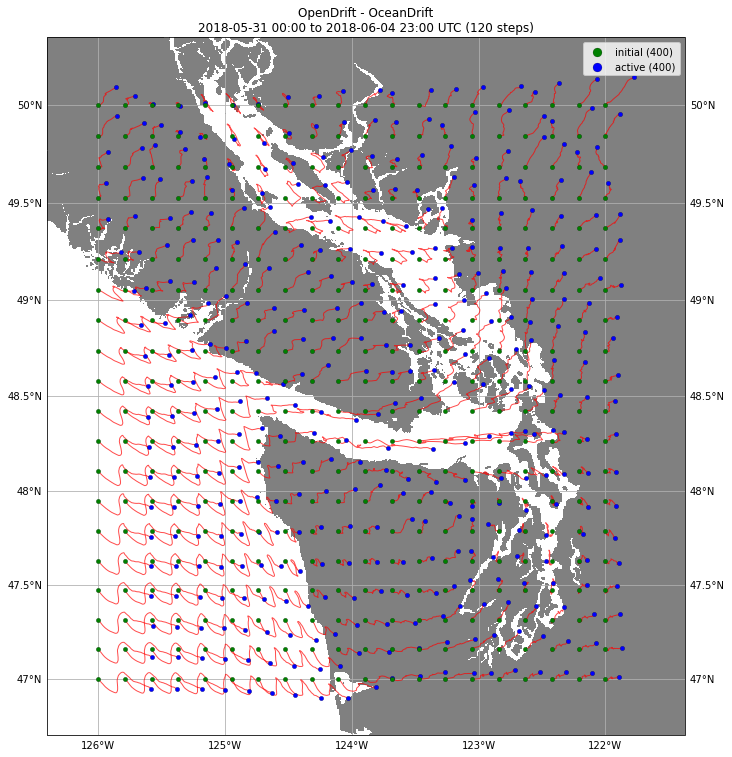

(<GeoAxesSubplot:title={'center':'OpenDrift - OceanDrift\n2018-05-31 00:00 to 2018-06-04 23:00 UTC (120 steps)'}>,
 <module 'matplotlib.pyplot' from '/home/soontiensn/miniconda/envs/opendrift_NEMO_reader_test/lib/python3.9/site-packages/matplotlib/pyplot.py'>)

In [6]:
owest.plot(fast=True,linecolor='r')

# HRDPS east

In [7]:
reader = reader_netCDF_CF_irregular2D.Reader(os.path.join(HRDPS_east, '*.nc'))
reader

15:39:31 INFO    opendrift.readers.reader_netCDF_CF_irregular2D: Opening dataset: /home/soontiensn/data/opendrift_test_data/HRDPS/east/*.nc
15:39:31 INFO    opendrift.readers.reader_netCDF_CF_irregular2D: Opening files with MFDataset
15:39:31 DEBUG   opendrift.readers.basereader.variables: Setting buffer size 9 for reader /home/soontiensn/data/opendrift_test_data/HRDPS/east/*.nc, assuming a maximum average speed of 5 m/s and time span of 1:00:00
15:39:31 DEBUG   opendrift.readers.basereader: Variable mapping: ['sea_floor_depth_below_sea_level'] -> ['land_binary_mask'] is not activated


Reader: /home/soontiensn/data/opendrift_test_data/HRDPS/east/*.nc
Projection: 
  +proj=latlong
Coverage: [degrees]
  xmin: -80.619415   xmax: -41.124542   step: 0.0248324   numx: 1591
  ymin: 32.853920   ymax: 60.843861   step: 0.0169966   numy: 1647
  Corners (lon, lat):
    (-59.91,  60.84)  (-41.12,  48.26)
    (-80.62,  42.42)  (-62.52,  32.85)
Vertical levels [m]: 
  Not specified
Available time range:
  start: 2020-09-05 00:00:00   end: 2020-09-08 23:00:00   step: 1:00:00
    96 times (0 missing)
Variables:
  time
  latitude
  longitude
  x_wind
  y_wind

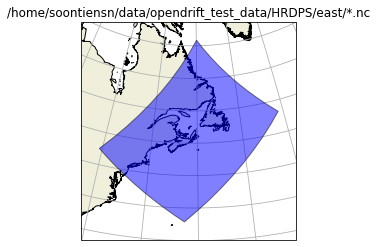

In [8]:
reader.plot()

In [9]:
oeast = OceanDrift()
oeast.add_reader([reader,])
lons=np.linspace(-70,-65,num=20)
lats=np.linspace(47.5,50,num=20)
lons,lats = np.meshgrid(lons,lats)
oeast.seed_elements(lon=lons, lat=lats, z=0, time=reader.start_time)
oeast.set_config('environment:fallback:x_sea_water_velocity', 0)
oeast.set_config('environment:fallback:y_sea_water_velocity', 0)
oeast.set_config('general:coastline_action', 'none')
oeast.set_config('seed:ocean_only', False)
oeast.run()

15:39:32 DEBUG   opendrift.models.oceandrift: No machine learning correction available.
15:39:32 DEBUG   opendrift.models.basemodel: Adding 17 config items from basemodel
15:39:32 DEBUG   opendrift.models.basemodel: Adding 4 config items from basemodel
15:39:32 DEBUG   opendrift.models.basemodel: Adding 36 config items from basemodel
15:39:32 INFO    opendrift.models.basemodel: OpenDriftSimulation initialised (version 1.7.3 / v1.0.4-2023-g6dec0e5-dirty)
15:39:32 DEBUG   opendrift.models.basemodel: Adding 14 config items from oceandrift
15:39:32 DEBUG   opendrift.models.basemodel:   Overwriting config item seed:z
15:39:32 DEBUG   opendrift.readers.basereader.variables: Setting buffer size 4 for reader /home/soontiensn/data/opendrift_test_data/HRDPS/east/*.nc, assuming a maximum average speed of 1 m/s and time span of 1:00:00
15:39:32 DEBUG   opendrift.models.basemodel: Added reader /home/soontiensn/data/opendrift_test_data/HRDPS/east/*.nc
15:39:32 DEBUG   opendrift.models.basemodel: 
--

15:39:35 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: 0 (min) 0 (max)
15:39:35 DEBUG   opendrift.models.basemodel:     x_wind: 1.09344 (min) 5.67852 (max)
15:39:35 DEBUG   opendrift.models.basemodel:     y_wind: -0.900109 (min) 4.30948 (max)
15:39:35 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:39:35 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:39:35 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:39:35 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:39:35 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:39:35 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
15:39:35 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_seco

15:39:36 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:39:36 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:39:36 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:39:36 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:39:36 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:39:36 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:39:36 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
15:39:36 DEBUG   opendrift.models.basemodel: ---------------------------------
15:39:36 DEBUG   opendrift.models.basemodel: 		400 active elements
15:39:36 DEBUG   opendrift.models.basemodel: 		47.50008014605648 <- latitude  -> 50.00234094621563
15:39:36 DEBUG   opendrift.models.basemodel: 		-69.99844844017012 <- longitude -> -64.994312707805

15:39:36 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:39:36 DEBUG   opendrift.models.basemodel: ---------------------------------
15:39:36 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.024137, mean: 0.189772, max: 0.759278
15:39:36 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:39:36 DEBUG   opendrift.models.physics_methods:    min: 0.846391, mean: 2.183932, max: 4.747118
15:39:36 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 0.846391, mean: 2.183932, max: 4.747118
15:39:36 DEBUG   opendrift.models.basemodel: No elements to deactivate
15:39:36 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:39:36 DEBUG   opendrift.models.physics_methods: Advecting 400 of 400 elements above 0.100m with wind-sheared ocean current (0.019811 m/s - 0.111112 m/s)
15:39:36 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:39:36 DEBUG   opendrift.models.ocea

15:39:37 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:39:37 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:39:37 DEBUG   opendrift.models.basemodel: 400 active elements (0 deactivated)
15:39:37 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:39:37 DEBUG   opendrift.models.basemodel: ======================================================================
15:39:37 INFO    opendrift.models.basemodel: 2020-09-05 04:00:00 - step 5 of 95 - 400 active elements (0 deactivated)
15:39:37 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:39:37 DEBUG   opendrift.models.basemodel: ======================================================================
15:39:37 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:37 DEBUG   opendrift.models.basemodel: Variable group ['x_wind', 'y_wind']
15:39:37 DEBUG   opendrift.models.basemodel: ---------------------------

15:39:37 DEBUG   opendrift.models.basemodel: Calling reader /home/soontiensn/data/opendrift_test_data/HRDPS/east/*.nc
15:39:37 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:37 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:39:37 DEBUG   opendrift.readers.basereader.variables: Fetching variables from /home/soontiensn/data/opendrift_test_data/HRDPS/east/*.nc
15:39:37 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2020-09-05 05:00:00 (before)
		2020-09-05 06:00:00 (after)
15:39:37 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:39:37 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:39:38 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Time for netCDF_CF_irregular2D reader: 0:00:00.394903
15:39:38 DEBUG   opendrift.readers.basereader.variables: Checking x_wind for invalid values
15:39:38 DEBUG   opendrift.readers.basereader.variables: Checkin

15:39:38 DEBUG   opendrift.readers.basereader.variables: Checking y_wind for invalid values
15:39:38 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 219x172x400) for time before (2020-09-05 06:00:00)
15:39:38 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2020-09-05 06:00:00) in space  (linearNDFast)
15:39:38 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:39:38 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
15:39:38 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:39:38 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:39:38 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:38 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
15:39:38 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39

15:39:38 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
15:39:38 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:38 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:39:38 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
15:39:38 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
15:39:38 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
15:39:38 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:39:38 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:39:38 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:39:38 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:39:38 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean

15:39:39 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:39:39 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:39:39 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0 (min) 0 (max)
15:39:39 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: 0 (min) 0 (max)
15:39:39 DEBUG   opendrift.models.basemodel:     x_wind: 0.731095 (min) 5.49732 (max)
15:39:39 DEBUG   opendrift.models.basemodel:     y_wind: -0.742981 (min) 3.74924 (max)
15:39:39 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:39:39 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:39:39 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:39:39 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:39:39 DEBUG   opendrift.models.basemodel:     sea_surf

15:39:39 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:39:39 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
15:39:39 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:39:39 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:39:39 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:39:39 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:39:39 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:39:39 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:39:39 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:39:39 DEBUG   opendrift.models.basemode

15:39:40 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
15:39:40 DEBUG   opendrift.models.basemodel: ---------------------------------
15:39:40 DEBUG   opendrift.models.basemodel: 		400 active elements
15:39:40 DEBUG   opendrift.models.basemodel: 		47.500346105233106 <- latitude  -> 50.01574200690252
15:39:40 DEBUG   opendrift.models.basemodel: 		-69.98501328022463 <- longitude -> -64.95729693558754
15:39:40 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:39:40 DEBUG   opendrift.models.basemodel: ---------------------------------
15:39:40 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.020372, mean: 0.236829, max: 0.955769
15:39:40 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:39:40 DEBUG   opendrift.models.physics_methods:    min: 0.777577, mean: 2.314088, max: 5.326059
15:39:40 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 0.777577, mean: 2.314088, max: 5.3

15:39:40 DEBUG   opendrift.models.basemodel: No elements to deactivate
15:39:40 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:39:40 DEBUG   opendrift.models.physics_methods: Advecting 400 of 400 elements above 0.100m with wind-sheared ocean current (0.018632 m/s - 0.132416 m/s)
15:39:40 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:39:40 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:39:40 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:39:40 DEBUG   opendrift.models.basemodel: 400 active elements (0 deactivated)
15:39:40 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:39:40 DEBUG   opendrift.models.basemodel: ======================================================================
15:39:40 INFO    opendrift.models.basemodel: 2020-09-05 12:00:00 - step 13 of 95 - 400 active elements (0 deactivated)
15:39:40 DEBUG   opendrift.models.b

15:39:41 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:39:41 DEBUG   opendrift.models.basemodel: ======================================================================
15:39:41 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:41 DEBUG   opendrift.models.basemodel: Variable group ['x_wind', 'y_wind']
15:39:41 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:41 DEBUG   opendrift.models.basemodel: Calling reader /home/soontiensn/data/opendrift_test_data/HRDPS/east/*.nc
15:39:41 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:41 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:39:41 DEBUG   opendrift.readers.basereader.variables: Fetching variables from /home/soontiensn/data/opendrift_test_data/HRDPS/east/*.nc
15:39:41 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2020-09-05 13:00:00 (before)
		2020-09-05 14:00:00 (after)
15:39:41 DEBUG 

15:39:41 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:39:41 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:39:41 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Time for netCDF_CF_irregular2D reader: 0:00:00.385140
15:39:41 DEBUG   opendrift.readers.basereader.variables: Checking x_wind for invalid values
15:39:41 DEBUG   opendrift.readers.basereader.variables: Checking y_wind for invalid values
15:39:41 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 220x173x400) for time before (2020-09-05 14:00:00)
15:39:41 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2020-09-05 14:00:00) in space  (linearNDFast)
15:39:41 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:39:41 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
15:39:41 DEBUG   opendrift.readers.basereader.variables: Reader projec

15:39:42 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:39:42 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:39:42 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:42 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
15:39:42 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:42 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
15:39:42 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:42 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:39:42 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
15:39:42 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
15:39:42 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
15:39:42 DEBUG   opendrift.readers.b

15:39:42 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:39:42 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:39:42 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:39:42 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:39:42 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:39:42 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:39:42 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:39:42 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0 (min) 0 (max)
15:39:42 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: 0 (min) 0 (max)
15:39:42 DEBUG   opendrift.models.basemodel:     x_wind: 0.0864742 (min) 7.53371 (max)
15:39:42 DEBUG   opendrif

15:39:43 DEBUG   opendrift.models.basemodel:     y_wind: -1.94551 (min) 5.06836 (max)
15:39:43 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:39:43 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:39:43 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:39:43 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:39:43 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:39:43 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
15:39:43 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:39:43 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:39:43 DEBUG   opendrift.models.basemodel:

15:39:43 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:39:43 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:39:43 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:39:43 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:39:43 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:39:43 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
15:39:43 DEBUG   opendrift.models.basemodel: ---------------------------------
15:39:43 DEBUG   opendrift.models.basemodel: 		400 active elements
15:39:43 DEBUG   opendrift.models.basemodel: 		47.49961755606515 <- latitude  -> 50.03527000504267
15:39:43 DEBUG   opendrift.models.basemodel: 		-69.97308983047864 <- longitude -> -64.90477951384995
15:39:43 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:39:43 DEBUG   opendrift.models.

15:39:44 DEBUG   opendrift.models.basemodel: ---------------------------------
15:39:44 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.060514, mean: 0.346119, max: 1.424024
15:39:44 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:39:44 DEBUG   opendrift.models.physics_methods:    min: 1.340162, mean: 2.902770, max: 6.501121
15:39:44 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.340162, mean: 2.902770, max: 6.501121
15:39:44 DEBUG   opendrift.models.basemodel: No elements to deactivate
15:39:44 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:39:44 DEBUG   opendrift.models.physics_methods: Advecting 400 of 400 elements above 0.100m with wind-sheared ocean current (0.031368 m/s - 0.152167 m/s)
15:39:44 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:39:44 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
1

15:39:44 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:39:44 DEBUG   opendrift.models.basemodel: 400 active elements (0 deactivated)
15:39:44 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:39:44 DEBUG   opendrift.models.basemodel: ======================================================================
15:39:44 INFO    opendrift.models.basemodel: 2020-09-05 21:00:00 - step 22 of 95 - 400 active elements (0 deactivated)
15:39:44 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:39:44 DEBUG   opendrift.models.basemodel: ======================================================================
15:39:44 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:44 DEBUG   opendrift.models.basemodel: Variable group ['x_wind', 'y_wind']
15:39:44 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:44 DEBUG   opendrift.models.basemodel: Calling reader /home/soontiensn/

15:39:44 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:44 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:39:44 DEBUG   opendrift.readers.basereader.variables: Fetching variables from /home/soontiensn/data/opendrift_test_data/HRDPS/east/*.nc
15:39:44 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2020-09-05 22:00:00 (before)
		2020-09-05 23:00:00 (after)
15:39:45 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:39:45 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:39:45 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Time for netCDF_CF_irregular2D reader: 0:00:00.400308
15:39:45 DEBUG   opendrift.readers.basereader.variables: Checking x_wind for invalid values
15:39:45 DEBUG   opendrift.readers.basereader.variables: Checking y_wind for invalid values
15:39:45 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 222x174x

15:39:45 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2020-09-05 23:00:00) in space  (linearNDFast)
15:39:45 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:39:45 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
15:39:45 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:39:45 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:39:45 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:45 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
15:39:45 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:45 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
15:39:45 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:45 DEBUG   opendrift.models.basemodel: Data needed for 400 ele

15:39:46 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:39:46 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
15:39:46 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
15:39:46 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
15:39:46 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:39:46 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:39:46 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:39:46 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:39:46 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:39:46 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:39:46 DEBUG  

15:39:46 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:39:46 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0 (min) 0 (max)
15:39:46 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: 0 (min) 0 (max)
15:39:46 DEBUG   opendrift.models.basemodel:     x_wind: 0.0182818 (min) 4.92551 (max)
15:39:46 DEBUG   opendrift.models.basemodel:     y_wind: -0.390504 (min) 3.92232 (max)
15:39:46 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:39:46 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:39:46 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:39:46 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:39:46 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:39:46 DEBUG   opendrift.models.basemodel:     sea_surface_wave_perio

15:39:47 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:39:47 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:39:47 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:39:47 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:39:47 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:39:47 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:39:47 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:39:47 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
15:39:47 DEBUG   opendrift.models.basemodel: ---------------------------------
15:39:47 DEBUG   opendrift.models.basemodel: 		400 active elements
15:39:47 DEBUG   opendrift.models.basemodel: 		

15:39:47 DEBUG   opendrift.models.basemodel: 		47.502342917276785 <- latitude  -> 50.05335287466173
15:39:47 DEBUG   opendrift.models.basemodel: 		-69.96007889666198 <- longitude -> -64.85385330722293
15:39:47 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:39:47 DEBUG   opendrift.models.basemodel: ---------------------------------
15:39:47 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.003776, mean: 0.163747, max: 0.962535
15:39:47 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:39:47 DEBUG   opendrift.models.physics_methods:    min: 0.334766, mean: 1.927528, max: 5.344879
15:39:47 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 0.334766, mean: 1.927528, max: 5.344879
15:39:47 DEBUG   opendrift.models.basemodel: No elements to deactivate
15:39:47 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:39:47 DEBUG   opendrift.models.physics_methods: Advecting 400 of 400 element

15:39:48 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:39:48 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:39:48 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:39:48 DEBUG   opendrift.models.basemodel: 400 active elements (0 deactivated)
15:39:48 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:39:48 DEBUG   opendrift.models.basemodel: ======================================================================
15:39:48 INFO    opendrift.models.basemodel: 2020-09-06 05:00:00 - step 30 of 95 - 400 active elements (0 deactivated)
15:39:48 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:39:48 DEBUG   opendrift.models.basemodel: ======================================================================
15:39:48 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:48 DEBUG   opendrift.models.basemodel: Variable group ['x_wi

15:39:48 DEBUG   opendrift.models.basemodel: Variable group ['x_wind', 'y_wind']
15:39:48 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:48 DEBUG   opendrift.models.basemodel: Calling reader /home/soontiensn/data/opendrift_test_data/HRDPS/east/*.nc
15:39:48 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:48 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:39:48 DEBUG   opendrift.readers.basereader.variables: Fetching variables from /home/soontiensn/data/opendrift_test_data/HRDPS/east/*.nc
15:39:48 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2020-09-06 06:00:00 (before)
		2020-09-06 07:00:00 (after)
15:39:48 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:39:48 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:39:48 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Time for netCDF_CF_irregular2D reader: 0:00

15:39:49 DEBUG   opendrift.readers.basereader.variables: Checking x_wind for invalid values
15:39:49 DEBUG   opendrift.readers.basereader.variables: Checking y_wind for invalid values
15:39:49 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 223x174x400) for time before (2020-09-06 07:00:00)
15:39:49 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2020-09-06 07:00:00) in space  (linearNDFast)
15:39:49 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:39:49 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
15:39:49 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:39:49 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:39:49 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:49 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']

15:39:49 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:49 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
15:39:49 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:49 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:39:49 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
15:39:49 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
15:39:49 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
15:39:49 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:39:49 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:39:49 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:39:49 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:39:49 DEBUG   opendrift.models

15:39:50 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:39:50 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:39:50 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:39:50 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0 (min) 0 (max)
15:39:50 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: 0 (min) 0 (max)
15:39:50 DEBUG   opendrift.models.basemodel:     x_wind: 0.374934 (min) 5.69466 (max)
15:39:50 DEBUG   opendrift.models.basemodel:     y_wind: -0.426972 (min) 3.5235 (max)
15:39:50 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:39:50 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:39:50 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:39:50 DEBUG   opend

15:39:50 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:39:50 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:39:50 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
15:39:50 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:39:50 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:39:50 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:39:50 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:39:50 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:39:50 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:39:50 DEBUG   opendrift.models.basemod

15:39:51 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:39:51 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
15:39:51 DEBUG   opendrift.models.basemodel: ---------------------------------
15:39:51 DEBUG   opendrift.models.basemodel: 		400 active elements
15:39:51 DEBUG   opendrift.models.basemodel: 		47.505390030867716 <- latitude  -> 50.060560608819856
15:39:51 DEBUG   opendrift.models.basemodel: 		-69.9494175925861 <- longitude -> -64.81542175584553
15:39:51 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:39:51 DEBUG   opendrift.models.basemodel: ---------------------------------
15:39:51 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.011702, mean: 0.156319, max: 0.889237
15:39:51 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:39:51 DEBUG   opendrift.models.physics_methods:    min: 0.589338, mean: 1.822327, max: 5.137341
15:39:51 DEBUG   op

15:39:51 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 0.688665, mean: 1.794683, max: 5.253674
15:39:51 DEBUG   opendrift.models.basemodel: No elements to deactivate
15:39:51 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:39:51 DEBUG   opendrift.models.physics_methods: Advecting 400 of 400 elements above 0.100m with wind-sheared ocean current (0.016119 m/s - 0.122969 m/s)
15:39:51 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:39:51 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:39:51 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:39:51 DEBUG   opendrift.models.basemodel: 400 active elements (0 deactivated)
15:39:51 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:39:51 DEBUG   opendrift.models.basemodel: ======================================================================
15:39:51 INFO    opendr

15:39:52 INFO    opendrift.models.basemodel: 2020-09-06 14:00:00 - step 39 of 95 - 400 active elements (0 deactivated)
15:39:52 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:39:52 DEBUG   opendrift.models.basemodel: ======================================================================
15:39:52 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:52 DEBUG   opendrift.models.basemodel: Variable group ['x_wind', 'y_wind']
15:39:52 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:52 DEBUG   opendrift.models.basemodel: Calling reader /home/soontiensn/data/opendrift_test_data/HRDPS/east/*.nc
15:39:52 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:52 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:39:52 DEBUG   opendrift.readers.basereader.variables: Fetching variables from /home/soontiensn/data/opendrift_test_data/HRDPS/east/*.nc
15:39:52 DEBUG   opendrift.r

15:39:52 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2020-09-06 15:00:00 (before)
		2020-09-06 16:00:00 (after)
15:39:52 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:39:52 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:39:52 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Time for netCDF_CF_irregular2D reader: 0:00:00.395205
15:39:52 DEBUG   opendrift.readers.basereader.variables: Checking x_wind for invalid values
15:39:52 DEBUG   opendrift.readers.basereader.variables: Checking y_wind for invalid values
15:39:52 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 224x175x400) for time before (2020-09-06 15:00:00)
15:39:52 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2020-09-06 15:00:00) in space  (linearNDFast)
15:39:52 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:39:52 DEBUG   opendrift.readers.baserea

15:39:53 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
15:39:53 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:39:53 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:39:53 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:53 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
15:39:53 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:53 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
15:39:53 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:53 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:39:53 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
15:39:53 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
15:39:53 DEBUG   opendrift.readers

15:39:53 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
15:39:53 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:39:53 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:39:53 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:39:53 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:39:53 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:39:53 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:39:53 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:39:53 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0 (min) 0 (max)
15:39:53 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: 0 (min) 0 (max)
15:39:53 D

15:39:54 DEBUG   opendrift.models.basemodel:     x_wind: -0.589995 (min) 5.3233 (max)
15:39:54 DEBUG   opendrift.models.basemodel:     y_wind: -1.84476 (min) 4.46999 (max)
15:39:54 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:39:54 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:39:54 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:39:54 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:39:54 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:39:54 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
15:39:54 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:39:54 DEBUG   opendrift.models.basemodel:     s

15:39:54 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:39:54 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:39:54 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:39:54 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:39:54 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:39:54 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:39:54 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
15:39:54 DEBUG   opendrift.models.basemodel: ---------------------------------
15:39:54 DEBUG   opendrift.models.basemodel: 		400 active elements
15:39:54 DEBUG   opendrift.models.basemodel: 		47.505344547984905 <- latitude  -> 50.07137553986437
15:39:54 DEBUG   opendrift.models.basemodel: 		-69.94840011192126 <- longitude -> -64.77411140191

15:39:55 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:39:55 DEBUG   opendrift.models.basemodel: ---------------------------------
15:39:55 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.013010, mean: 0.204892, max: 0.887182
15:39:55 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:39:55 DEBUG   opendrift.models.physics_methods:    min: 0.621392, mean: 2.231935, max: 5.131402
15:39:55 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 0.621392, mean: 2.231935, max: 5.131402
15:39:55 DEBUG   opendrift.models.basemodel: No elements to deactivate
15:39:55 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:39:55 DEBUG   opendrift.models.physics_methods: Advecting 400 of 400 elements above 0.100m with wind-sheared ocean current (0.014544 m/s - 0.120107 m/s)
15:39:55 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:39:55 DEBUG   opendrift.models.ocea

15:39:55 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:39:55 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:39:55 DEBUG   opendrift.models.basemodel: 400 active elements (0 deactivated)
15:39:55 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:39:55 DEBUG   opendrift.models.basemodel: ======================================================================
15:39:55 INFO    opendrift.models.basemodel: 2020-09-06 22:00:00 - step 47 of 95 - 400 active elements (0 deactivated)
15:39:55 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:39:55 DEBUG   opendrift.models.basemodel: ======================================================================
15:39:55 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:55 DEBUG   opendrift.models.basemodel: Variable group ['x_wind', 'y_wind']
15:39:55 DEBUG   opendrift.models.basemodel: --------------------------

15:39:56 DEBUG   opendrift.models.basemodel: Calling reader /home/soontiensn/data/opendrift_test_data/HRDPS/east/*.nc
15:39:56 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:56 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:39:56 DEBUG   opendrift.readers.basereader.variables: Fetching variables from /home/soontiensn/data/opendrift_test_data/HRDPS/east/*.nc
15:39:56 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2020-09-06 23:00:00 (before)
		2020-09-07 00:00:00 (after)
15:39:56 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:39:56 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:39:56 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Time for netCDF_CF_irregular2D reader: 0:00:00.407037
15:39:56 DEBUG   opendrift.readers.basereader.variables: Checking x_wind for invalid values
15:39:56 DEBUG   opendrift.readers.basereader.variables: Checkin

15:39:56 DEBUG   opendrift.readers.basereader.variables: Checking y_wind for invalid values
15:39:56 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 226x176x400) for time before (2020-09-07 00:00:00)
15:39:56 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2020-09-07 00:00:00) in space  (linearNDFast)
15:39:56 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:39:56 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
15:39:56 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:39:56 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:39:56 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:56 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
15:39:56 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39

15:39:57 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
15:39:57 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:57 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:39:57 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
15:39:57 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
15:39:57 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
15:39:57 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:39:57 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:39:57 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:39:57 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:39:57 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean

15:39:57 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:39:57 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:39:57 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0 (min) 0 (max)
15:39:57 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: 0 (min) 0 (max)
15:39:57 DEBUG   opendrift.models.basemodel:     x_wind: -1.29087 (min) 2.896 (max)
15:39:57 DEBUG   opendrift.models.basemodel:     y_wind: -0.853939 (min) 2.9645 (max)
15:39:57 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:39:57 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:39:57 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:39:57 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:39:57 DEBUG   opendrift.models.basemodel:     sea_surface

15:39:58 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:39:58 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
15:39:58 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:39:58 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:39:58 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:39:58 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:39:58 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:39:58 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:39:58 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:39:58 DEBUG   opendrift.models.basemode

15:39:58 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
15:39:58 DEBUG   opendrift.models.basemodel: ---------------------------------
15:39:58 DEBUG   opendrift.models.basemodel: 		400 active elements
15:39:58 DEBUG   opendrift.models.basemodel: 		47.50588328343113 <- latitude  -> 50.08059160393069
15:39:58 DEBUG   opendrift.models.basemodel: 		-69.94946503895025 <- longitude -> -64.73757611898232
15:39:58 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:39:58 DEBUG   opendrift.models.basemodel: ---------------------------------
15:39:58 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000443, mean: 0.053709, max: 0.283916
15:39:58 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:39:58 DEBUG   opendrift.models.physics_methods:    min: 0.114700, mean: 1.157698, max: 2.902847
15:39:58 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 0.114700, mean: 1.157698, max: 2.90

15:39:59 DEBUG   opendrift.models.basemodel: No elements to deactivate
15:39:59 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:39:59 DEBUG   opendrift.models.physics_methods: Advecting 400 of 400 elements above 0.100m with wind-sheared ocean current (0.001749 m/s - 0.072874 m/s)
15:39:59 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:39:59 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:39:59 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:39:59 DEBUG   opendrift.models.basemodel: 400 active elements (0 deactivated)
15:39:59 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:39:59 DEBUG   opendrift.models.basemodel: ======================================================================
15:39:59 INFO    opendrift.models.basemodel: 2020-09-07 06:00:00 - step 55 of 95 - 400 active elements (0 deactivated)
15:39:59 DEBUG   opendrift.models.b

15:39:59 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:39:59 DEBUG   opendrift.models.basemodel: ======================================================================
15:39:59 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:59 DEBUG   opendrift.models.basemodel: Variable group ['x_wind', 'y_wind']
15:39:59 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:59 DEBUG   opendrift.models.basemodel: Calling reader /home/soontiensn/data/opendrift_test_data/HRDPS/east/*.nc
15:39:59 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:39:59 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:39:59 DEBUG   opendrift.readers.basereader.variables: Fetching variables from /home/soontiensn/data/opendrift_test_data/HRDPS/east/*.nc
15:39:59 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2020-09-07 07:00:00 (before)
		2020-09-07 08:00:00 (after)
15:39:59 DEBUG 

15:40:00 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:40:00 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:40:00 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Time for netCDF_CF_irregular2D reader: 0:00:00.406869
15:40:00 DEBUG   opendrift.readers.basereader.variables: Checking x_wind for invalid values
15:40:00 DEBUG   opendrift.readers.basereader.variables: Checking y_wind for invalid values
15:40:00 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 227x175x400) for time before (2020-09-07 08:00:00)
15:40:00 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2020-09-07 08:00:00) in space  (linearNDFast)
15:40:00 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:40:00 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
15:40:00 DEBUG   opendrift.readers.basereader.variables: Reader projec

15:40:01 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:40:01 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:40:01 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
15:40:01 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:40:01 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
15:40:01 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:40:01 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:40:01 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
15:40:01 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
15:40:01 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
15:40:01 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:40:01 DEBUG   opendrift.models.ba

15:40:01 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:40:01 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:40:01 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:40:01 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:40:01 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:40:01 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:40:01 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0 (min) 0 (max)
15:40:01 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: 0 (min) 0 (max)
15:40:01 DEBUG   opendrift.models.basemodel:     x_wind: -2.44848 (min) 2.49892 (max)
15:40:01 DEBUG   opendrift.models.basemodel:     y_wind: -0.748308 (min) 4.84011 (max)
15:40:01 DEBUG   opendrift.models.basemodel:     upward_sea_w

15:40:01 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:40:01 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:40:01 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:40:01 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:40:01 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:40:01 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
15:40:01 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:40:01 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:40:01 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:40:01 DEBUG   opendrift.models.base

15:40:02 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:40:02 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:40:02 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:40:02 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:40:02 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
15:40:02 DEBUG   opendrift.models.basemodel: ---------------------------------
15:40:02 DEBUG   opendrift.models.basemodel: 		400 active elements
15:40:02 DEBUG   opendrift.models.basemodel: 		47.510465186117436 <- latitude  -> 50.08080250927389
15:40:02 DEBUG   opendrift.models.basemodel: 		-69.947454092025 <- longitude -> -64.73494393299514
15:40:02 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:40:02 DEBUG   opendrift.models.basemodel: ---------------------------------
15:40:02 DEBUG   opendrift.models.physics_method

15:40:02 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.001424, mean: 0.141661, max: 0.614903
15:40:02 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:40:02 DEBUG   opendrift.models.physics_methods:    min: 0.205599, mean: 1.861583, max: 4.272015
15:40:02 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 0.205599, mean: 1.861583, max: 4.272015
15:40:02 DEBUG   opendrift.models.basemodel: No elements to deactivate
15:40:02 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:40:02 DEBUG   opendrift.models.physics_methods: Advecting 400 of 400 elements above 0.100m with wind-sheared ocean current (0.004812 m/s - 0.099992 m/s)
15:40:02 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:40:02 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:40:02 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no ran

15:40:03 DEBUG   opendrift.models.basemodel: 400 active elements (0 deactivated)
15:40:03 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:40:03 DEBUG   opendrift.models.basemodel: ======================================================================
15:40:03 INFO    opendrift.models.basemodel: 2020-09-07 15:00:00 - step 64 of 95 - 400 active elements (0 deactivated)
15:40:03 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:40:03 DEBUG   opendrift.models.basemodel: ======================================================================
15:40:03 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:40:03 DEBUG   opendrift.models.basemodel: Variable group ['x_wind', 'y_wind']
15:40:03 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:40:03 DEBUG   opendrift.models.basemodel: Calling reader /home/soontiensn/data/opendrift_test_data/HRDPS/east/*.nc
15:40:03 DEBUG   opendrift.models.basemodel: ----

15:40:03 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:40:03 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:40:03 DEBUG   opendrift.readers.basereader.variables: Fetching variables from /home/soontiensn/data/opendrift_test_data/HRDPS/east/*.nc
15:40:03 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2020-09-07 16:00:00 (before)
		2020-09-07 17:00:00 (after)
15:40:03 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:40:04 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:40:04 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Time for netCDF_CF_irregular2D reader: 0:00:00.404141
15:40:04 DEBUG   opendrift.readers.basereader.variables: Checking x_wind for invalid values
15:40:04 DEBUG   opendrift.readers.basereader.variables: Checking y_wind for invalid values
15:40:04 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 226x175x

15:40:04 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2020-09-07 17:00:00) in space  (linearNDFast)
15:40:04 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:40:04 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
15:40:04 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:40:04 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:40:04 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:40:04 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
15:40:04 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:40:04 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
15:40:04 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:40:04 DEBUG   opendrift.models.basemodel: Data needed for 400 ele

15:40:05 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:40:05 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
15:40:05 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
15:40:05 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
15:40:05 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:40:05 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:40:05 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:40:05 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:40:05 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:40:05 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:40:05 DEBUG  

15:40:05 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:40:05 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0 (min) 0 (max)
15:40:05 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: 0 (min) 0 (max)
15:40:05 DEBUG   opendrift.models.basemodel:     x_wind: -5.93345 (min) 2.33493 (max)
15:40:05 DEBUG   opendrift.models.basemodel:     y_wind: 0.289534 (min) 6.92588 (max)
15:40:05 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:40:05 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:40:05 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:40:05 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:40:05 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:40:05 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_

15:40:05 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:40:05 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:40:05 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:40:05 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:40:05 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:40:05 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:40:05 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:40:05 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
15:40:05 DEBUG   opendrift.models.basemodel: ---------------------------------
15:40:05 DEBUG   opendrift.models.basemodel: 		400 active elements
15:40:05 DEBUG   opendrift.models.basemodel: 		

15:40:06 DEBUG   opendrift.models.basemodel: 		47.5231664301003 <- latitude  -> 50.09031219011982
15:40:06 DEBUG   opendrift.models.basemodel: 		-69.9512490279796 <- longitude -> -64.76856209807269
15:40:06 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:40:06 DEBUG   opendrift.models.basemodel: ---------------------------------
15:40:06 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.025298, mean: 0.480601, max: 1.684965
15:40:06 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:40:06 DEBUG   opendrift.models.physics_methods:    min: 0.866508, mean: 3.607901, max: 7.071719
15:40:06 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 0.866508, mean: 3.607901, max: 7.071719
15:40:06 DEBUG   opendrift.models.basemodel: No elements to deactivate
15:40:06 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:40:06 DEBUG   opendrift.models.physics_methods: Advecting 400 of 400 elements a

15:40:06 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:40:06 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:40:06 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:40:06 DEBUG   opendrift.models.basemodel: 400 active elements (0 deactivated)
15:40:06 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:40:06 DEBUG   opendrift.models.basemodel: ======================================================================
15:40:06 INFO    opendrift.models.basemodel: 2020-09-07 23:00:00 - step 72 of 95 - 400 active elements (0 deactivated)
15:40:06 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:40:06 DEBUG   opendrift.models.basemodel: ======================================================================
15:40:06 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:40:06 DEBUG   opendrift.models.basemodel: Variable group ['x_wi

15:40:07 DEBUG   opendrift.models.basemodel: Variable group ['x_wind', 'y_wind']
15:40:07 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:40:07 DEBUG   opendrift.models.basemodel: Calling reader /home/soontiensn/data/opendrift_test_data/HRDPS/east/*.nc
15:40:07 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:40:07 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:40:07 DEBUG   opendrift.readers.basereader.variables: Fetching variables from /home/soontiensn/data/opendrift_test_data/HRDPS/east/*.nc
15:40:07 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2020-09-08 00:00:00 (before)
		2020-09-08 01:00:00 (after)
15:40:07 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:40:07 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:40:07 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Time for netCDF_CF_irregular2D reader: 0:00

15:40:08 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:40:08 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:40:08 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Time for netCDF_CF_irregular2D reader: 0:00:00.475922
15:40:08 DEBUG   opendrift.readers.basereader.variables: Checking x_wind for invalid values
15:40:08 DEBUG   opendrift.readers.basereader.variables: Checking y_wind for invalid values
15:40:08 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 225x175x400) for time before (2020-09-08 01:00:00)
15:40:08 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2020-09-08 01:00:00) in space  (linearNDFast)
15:40:08 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:40:08 WARNING opendrift: Only NaNs input to linearNDFast - returning
15:40:08 WARNING opendrift: Only NaNs input to linearNDFast - returning
15:40:08 DEBUG   opendrift.rea

15:40:08 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:40:08 WARNING opendrift: Only NaNs input to linearNDFast - returning
15:40:08 WARNING opendrift: Only NaNs input to linearNDFast - returning
15:40:08 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
15:40:08 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:40:08 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:40:08 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:40:08 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
15:40:08 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:40:08 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
15:40:08 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:40:08 DEBUG   opendrift.models.basemodel: Data 

15:40:09 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:40:09 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
15:40:09 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:40:09 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:40:09 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
15:40:09 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
15:40:09 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
15:40:09 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:40:09 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:40:09 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:40:09 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:40:09 DEBUG   opendrift.models

15:40:10 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:40:10 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:40:10 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:40:10 DEBUG   opendrift.models.basemodel:     Using fallback value 0 for x_wind for 400 elements
15:40:10 DEBUG   opendrift.models.basemodel:     Using fallback value 0 for y_wind for 400 elements
15:40:10 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:40:10 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:40:10 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:40:10 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0 (min) 0 (max)
15:40:10 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: 0 (min) 0 (max)
15:40:10 DEBUG   opendrift.models.

15:40:10 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:40:10 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0 (min) 0 (max)
15:40:10 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: 0 (min) 0 (max)
15:40:10 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
15:40:10 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
15:40:10 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:40:10 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:40:10 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:40:10 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:40:10 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:40:10 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_densi

15:40:11 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:40:11 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:40:11 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
15:40:11 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:40:11 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:40:11 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:40:11 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:40:11 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:40:11 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:40:11 DEBUG   opendrift.models.basemod

15:40:11 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:40:11 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:40:11 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:40:11 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
15:40:11 DEBUG   opendrift.models.basemodel: ---------------------------------
15:40:11 DEBUG   opendrift.models.basemodel: 		400 active elements
15:40:11 DEBUG   opendrift.models.basemodel: 		47.52987936297387 <- latitude  -> 50.09938671288229
15:40:11 DEBUG   opendrift.models.basemodel: 		-69.94776139629917 <- longitude -> -64.78095196598032
15:40:11 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:40:11 DEBUG   opendrift.models.basemodel: ---------------------------------
15:40:11 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
15:40:11 DEBUG  

15:40:12 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:40:12 DEBUG   opendrift.models.basemodel: ---------------------------------
15:40:12 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
15:40:12 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:40:12 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
15:40:12 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
15:40:12 DEBUG   opendrift.models.basemodel: No elements to deactivate
15:40:12 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:40:12 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
15:40:12 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:40:12 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:40:12 DEBUG

15:40:12 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
15:40:12 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:40:12 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:40:12 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:40:12 DEBUG   opendrift.models.basemodel: 400 active elements (0 deactivated)
15:40:12 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:40:12 DEBUG   opendrift.models.basemodel: ======================================================================
15:40:12 INFO    opendrift.models.basemodel: 2020-09-08 10:00:00 - step 83 of 95 - 400 active elements (0 deactivated)
15:40:12 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:40:12 DEBUG   opendrift.models.basemodel: ======================================================================
15:40:12 DEBUG   opendrift.models.basemodel: -------------------

15:40:13 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:40:13 DEBUG   opendrift.models.basemodel: ======================================================================
15:40:13 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:40:13 DEBUG   opendrift.models.basemodel: Variable group ['x_wind', 'y_wind']
15:40:13 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:40:13 DEBUG   opendrift.models.basemodel: Calling reader /home/soontiensn/data/opendrift_test_data/HRDPS/east/*.nc
15:40:13 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:40:13 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:40:13 DEBUG   opendrift.readers.basereader.variables: Fetching variables from /home/soontiensn/data/opendrift_test_data/HRDPS/east/*.nc
15:40:13 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2020-09-08 11:00:00 (before)
		2020-09-08 12:00:00 (after)
15:40:13 DEBUG 

15:40:13 DEBUG   opendrift.readers.basereader.variables: Fetching variables from /home/soontiensn/data/opendrift_test_data/HRDPS/east/*.nc
15:40:13 DEBUG   opendrift.readers.basereader.structured: Reader time:
		2020-09-08 12:00:00 (before)
		2020-09-08 13:00:00 (after)
15:40:13 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:40:14 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Making interpolator...
15:40:14 DEBUG   opendrift.readers.reader_netCDF_CF_irregular2D: Time for netCDF_CF_irregular2D reader: 0:00:00.476649
15:40:14 DEBUG   opendrift.readers.basereader.variables: Checking x_wind for invalid values
15:40:14 DEBUG   opendrift.readers.basereader.variables: Checking y_wind for invalid values
15:40:14 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 225x175x400) for time before (2020-09-08 12:00:00)
15:40:14 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2020-09-08 12:00:00) in space  (linea

15:40:14 DEBUG   opendrift.readers.basereader.structured: Fetched env-block (size 225x175x400) for time before (2020-09-08 13:00:00)
15:40:14 DEBUG   opendrift.readers.basereader.structured: Interpolating before (2020-09-08 13:00:00) in space  (linearNDFast)
15:40:14 DEBUG   opendrift.readers.interpolation.structured: Initialising interpolator.
15:40:14 WARNING opendrift: Only NaNs input to linearNDFast - returning
15:40:14 WARNING opendrift: Only NaNs input to linearNDFast - returning
15:40:14 DEBUG   opendrift.readers.basereader.structured: No time interpolation needed - right on time.
15:40:14 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:40:14 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:40:14 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:40:14 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
15:40:14 DEBUG   opendrift.models.basem

15:40:15 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:40:15 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:40:15 DEBUG   opendrift.models.basemodel: Variable group ['land_binary_mask']
15:40:15 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:40:15 DEBUG   opendrift.models.basemodel: Calling reader global_landmask
15:40:15 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:40:15 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:40:15 DEBUG   opendrift.readers.basereader.variables: Fetching variables from global_landmask
15:40:15 DEBUG   opendrift.readers.basereader.continuous: Fetched env-before
15:40:15 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
15:40:15 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:40:15 DEBUG   opendrift.models.ba

15:40:15 DEBUG   opendrift.readers.basereader.variables: Checking land_binary_mask for invalid values
15:40:15 DEBUG   opendrift.readers.basereader.variables: Reader projection is latlon - rotation of vectors is not needed.
15:40:15 DEBUG   opendrift.models.basemodel: Obtained data for all elements.
15:40:15 DEBUG   opendrift.models.basemodel: ---------------------------------------
15:40:15 DEBUG   opendrift.models.basemodel: Finished processing all variable groups
15:40:15 DEBUG   opendrift.models.basemodel:     Using fallback value 0 for x_wind for 400 elements
15:40:15 DEBUG   opendrift.models.basemodel:     Using fallback value 0 for y_wind for 400 elements
15:40:15 DEBUG   opendrift.models.basemodel: Creating empty dictionary for profiles not profided by any reader: ['ocean_vertical_diffusivity']
15:40:15 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:40:15 DEBUG   opendrift.models.basemodel: ------------ SUMMAR

15:40:16 DEBUG   opendrift.models.basemodel:       Using fallback value 0 for ocean_vertical_diffusivity for all profiles
15:40:16 DEBUG   opendrift.models.basemodel: ------------ SUMMARY -------------
15:40:16 DEBUG   opendrift.models.basemodel:     x_sea_water_velocity: 0 (min) 0 (max)
15:40:16 DEBUG   opendrift.models.basemodel:     y_sea_water_velocity: 0 (min) 0 (max)
15:40:16 DEBUG   opendrift.models.basemodel:     x_wind: 0 (min) 0 (max)
15:40:16 DEBUG   opendrift.models.basemodel:     y_wind: 0 (min) 0 (max)
15:40:16 DEBUG   opendrift.models.basemodel:     upward_sea_water_velocity: 0 (min) 0 (max)
15:40:16 DEBUG   opendrift.models.basemodel:     ocean_vertical_diffusivity: 0 (min) 0 (max)
15:40:16 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:40:16 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:40:16 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_vel

15:40:16 DEBUG   opendrift.models.basemodel:     sea_surface_wave_significant_height: 0 (min) 0 (max)
15:40:16 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_x_velocity: 0 (min) 0 (max)
15:40:16 DEBUG   opendrift.models.basemodel:     sea_surface_wave_stokes_drift_y_velocity: 0 (min) 0 (max)
15:40:16 DEBUG   opendrift.models.basemodel:     sea_surface_wave_period_at_variance_spectral_density_maximum: 0 (min) 0 (max)
15:40:16 DEBUG   opendrift.models.basemodel:     sea_surface_wave_mean_period_from_variance_spectral_density_second_frequency_moment: 0 (min) 0 (max)
15:40:16 DEBUG   opendrift.models.basemodel:     surface_downward_x_stress: 0 (min) 0 (max)
15:40:16 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:40:16 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:40:16 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:40:16 DEBUG   opendrift.models.b

15:40:17 DEBUG   opendrift.models.basemodel:     surface_downward_y_stress: 0 (min) 0 (max)
15:40:17 DEBUG   opendrift.models.basemodel:     turbulent_kinetic_energy: 0 (min) 0 (max)
15:40:17 DEBUG   opendrift.models.basemodel:     turbulent_generic_length_scale: 0 (min) 0 (max)
15:40:17 DEBUG   opendrift.models.basemodel:     ocean_mixed_layer_thickness: 50 (min) 50 (max)
15:40:17 DEBUG   opendrift.models.basemodel:     sea_floor_depth_below_sea_level: 10000 (min) 10000 (max)
15:40:17 DEBUG   opendrift.models.basemodel:     land_binary_mask: 0 (min) 1 (max)
15:40:17 DEBUG   opendrift.models.basemodel: ---------------------------------
15:40:17 DEBUG   opendrift.models.basemodel: 		400 active elements
15:40:17 DEBUG   opendrift.models.basemodel: 		47.52987936297387 <- latitude  -> 50.09938671288229
15:40:17 DEBUG   opendrift.models.basemodel: 		-69.94776139629917 <- longitude -> -64.78095196598032
15:40:17 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:40:17 DEBUG   opendrift.models.

15:40:18 DEBUG   opendrift.models.basemodel: 		47.52987936297387 <- latitude  -> 50.09938671288229
15:40:18 DEBUG   opendrift.models.basemodel: 		-69.94776139629917 <- longitude -> -64.78095196598032
15:40:18 DEBUG   opendrift.models.basemodel: 		z = 0.0
15:40:18 DEBUG   opendrift.models.basemodel: ---------------------------------
15:40:18 DEBUG   opendrift.models.physics_methods: Calculating Hs from wind, min: 0.000000, mean: 0.000000, max: 0.000000
15:40:18 DEBUG   opendrift.models.physics_methods: Calculating wave period Tm02 from wind
15:40:18 DEBUG   opendrift.models.physics_methods:    min: 1.256637, mean: 1.256637, max: 1.256637
15:40:18 DEBUG   opendrift.models.physics_methods: Calculating wave period from wind, min: 1.256637, mean: 1.256637, max: 1.256637
15:40:18 DEBUG   opendrift.models.basemodel: No elements to deactivate
15:40:18 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:40:18 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocea

15:40:18 DEBUG   opendrift.models.basemodel: No elements to deactivate
15:40:18 DEBUG   opendrift.models.basemodel: Calling OceanDrift.update()
15:40:18 DEBUG   opendrift.models.physics_methods: No wind for wind-sheared ocean drift
15:40:18 DEBUG   opendrift.models.physics_methods: No Stokes drift velocity available
15:40:18 DEBUG   opendrift.models.oceandrift: No vertical advection for elements at surface
15:40:18 DEBUG   opendrift.models.basemodel: Horizontal diffusivity is 0, no random walk.
15:40:18 DEBUG   opendrift.models.basemodel: 400 active elements (0 deactivated)
15:40:18 DEBUG   opendrift.models.basemodel: to be seeded: 0, already seeded 400
15:40:18 DEBUG   opendrift.models.basemodel: ======================================================================
15:40:18 INFO    opendrift.models.basemodel: 2020-09-08 21:00:00 - step 94 of 95 - 400 active elements (0 deactivated)
15:40:18 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:40:18 DEBUG   opendrift.models.ba

15:40:19 INFO    opendrift.models.basemodel: 2020-09-08 22:00:00 - step 95 of 95 - 400 active elements (0 deactivated)
15:40:19 DEBUG   opendrift.models.basemodel: 0 elements scheduled.
15:40:19 DEBUG   opendrift.models.basemodel: ======================================================================
15:40:19 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:40:19 DEBUG   opendrift.models.basemodel: Variable group ['x_wind', 'y_wind']
15:40:19 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:40:19 DEBUG   opendrift.models.basemodel: Calling reader /home/soontiensn/data/opendrift_test_data/HRDPS/east/*.nc
15:40:19 DEBUG   opendrift.models.basemodel: ----------------------------------------
15:40:19 DEBUG   opendrift.models.basemodel: Data needed for 400 elements
15:40:19 DEBUG   opendrift.readers.basereader.variables: Fetching variables from /home/soontiensn/data/opendrift_test_data/HRDPS/east/*.nc
15:40:19 DEBUG   opendrift.r

15:40:19 WARNING opendrift.models.basemodel: Plotting fast. This will make your plots less accurate.
15:40:19 DEBUG   opendrift_landmask_data.mask: mask already memmapped


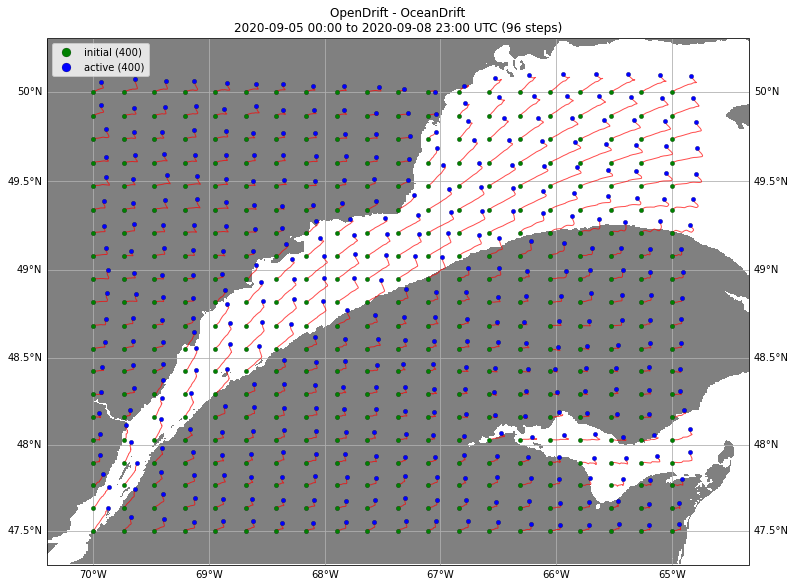

(<GeoAxesSubplot:title={'center':'OpenDrift - OceanDrift\n2020-09-05 00:00 to 2020-09-08 23:00 UTC (96 steps)'}>,
 <module 'matplotlib.pyplot' from '/home/soontiensn/miniconda/envs/opendrift_NEMO_reader_test/lib/python3.9/site-packages/matplotlib/pyplot.py'>)

In [10]:
oeast.plot(fast=True,linecolor='r')